In [138]:
# %pip install pandas
# %pip install numpy
# %pip install matplotlib
# %pip install seaborn
# %pip install scipy

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🎯 Objectifs :

Pour chaque identifiant 'id', vous devez prédire la probabilité de chacune des classes possibles : Status_C si le patient est encore vivant, Status_CL si il est vivant mais transplanté et Status_D si il est mort.

> Ce notebook à pour but  de faire l'analyse et le prétraitement (N'inclue pas le traitement des valeur manquantes) des variables.
> Il nous permettra d'obtenir des jeux de données nettoyés. Ces jeux de données seront ensuite utiliser pour la suite de notre projet pour effectuer tous nos tests (traitement des NaN, encodage, normalisation...) et modélisations.

# 📚 Dataset : 

* train.csv - l'ensemble d'entrainement ; Status est une variable catagorielle ; C indique que le patient est vivant au temps N_Days, CL indique que le patient est vivant au temps N_Days grâce à une transplantation du foie et D indique que le patient est mort au temps N_Days.
* test.csv - l'ensemble de test ; votre objectif est de prévoir la probabilité pour chacun des Status, i.e., Status_C, Status_CL, Status_D.

# 📈 Variables : 

- id : Identifiant unique de chaque patient ou enregistrement. 
- N_Days : La durée en jours pendant laquelle un patient a été suivi, fournissant un contexte temporel pour l'observation.
- Drug : Le médicament ou le traitement spécifique administré au patient pendant la période de surveillance.
- Age : Âge du patient.
- Sex : Sexe du patient.
- Ascites : présence ou absence d'accumulation de liquide dans la cavité abdominale, signe clinique clé souvent associé aux maladies du foie.
- Hepatomegaly : Une hypertrophie du foie, servant d'indicateur clinique important de la santé du foie.
- Spiders : Présence de telangiectasies en araignée (lésions vasculaires cutanées).
- Edema : Présence d’œdème. L'accumulation anormale de liquide, se manifestant généralement par un gonflement, et souvent liée à des complications hépatiques.
- Bilirubin : Niveau de bilirubine dans le sang (en mg/dL). Un marqueur sanguin clé indiquant la fonction hépatique ; des niveaux élevés peuvent suggérer un dysfonctionnement hépatique.
- Cholesterol : Niveau de cholestérol dans le sang (en mg/dL). Le taux de cholestérol dans le sang, un marqueur du profil lipidique pertinent pour la santé cardiovasculaire et métabolique.
- Albumin : Niveau d’albumine dans le sang (en g/dL). Une protéine synthétisée par le foie ; des niveaux faibles peuvent indiquer une maladie du foie et affecter l'équilibre protéique global
- Copper : Concentration de cuivre dans le sang ou l’urine (en µg/dL), indicateur d’une éventuelle maladie de Wilson ou autre désordre métabolique.
- Alk_Phos : Niveau de phosphatases alcalines (en UI/L), un indicateur de fonction hépatique ou osseuse.
- SGOT : Niveau d'enzymes transaminases (SGOT ou AST) (en UI/L). Enzyme indiquant la santé du foie et du cœur ; des niveaux élevés peuvent suggérer des lésions hépatiques.
- Tryglicerides : Niveau de triglycérides dans le sang (en mg/dL). Un type de graisse présente dans le sang, influençant la santé métabolique et cardiovasculaire.
- Platelets : Nombre de plaquettes dans le sang (en milliers/μL). Fragments de cellules sanguines, dont les niveaux anormaux indiquent potentiellement un dysfonctionnement hépatique.
- Prothrombin : Temps de prothrombine (en secondes ou % d’activité). Facteur de coagulation sanguine, dont les variations affectent le processus de coagulation.
- Stage : Stade de la maladie, basé sur un système de classification (1 à 4, où 4 est le plus sévère). 
- Status : État de santé du patient : C (vivant), CL(transplanté), D (mort). (VARIABLE CYBLE)

# <span style="color:red"> 🔴 1.  Exploration et préparation des données de la base d'entrainement</span>

## 💻 Importation 

In [140]:
train_df = pd.read_csv('classification-multi-classes/train.csv', 
                      delimiter = ",",
                      header = 0)

train_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,1055.0,NaN,19724.0,F,NaN,NaN,NaN,N,1.3,NaN,3.64,NaN,NaN,NaN,NaN,209.0,10.5,3.0,C
1,1,3282.0,Placebo,17884.0,F,N,Y,Y,N,0.7,309.0,3.60,96.0,1142.0,71.3,106.0,240.0,12.4,4.0,C
2,2,1653.0,NaN,20600.0,F,NaN,NaN,NaN,N,2.2,NaN,3.64,NaN,NaN,NaN,NaN,139.0,9.5,2.0,C
3,3,999.0,D-penicillamine,22514.0,F,N,Y,N,N,1.0,498.0,3.35,89.0,1601.0,164.3,85.0,394.0,9.7,3.0,C
4,4,2202.0,NaN,17897.0,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C


In [141]:
train_df.shape

(15000, 20)

## <span style="color:blue"> 🔷 Types des variables</span>

In [142]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15000 non-null  int64  
 1   N_Days         15000 non-null  float64
 2   Drug           8564 non-null   object 
 3   Age            15000 non-null  float64
 4   Sex            15000 non-null  object 
 5   Ascites        8563 non-null   object 
 6   Hepatomegaly   8564 non-null   object 
 7   Spiders        8555 non-null   object 
 8   Edema          15000 non-null  object 
 9   Bilirubin      15000 non-null  float64
 10  Cholesterol    6669 non-null   float64
 11  Albumin        15000 non-null  float64
 12  Copper         8452 non-null   float64
 13  Alk_Phos       8558 non-null   float64
 14  SGOT           8555 non-null   float64
 15  Tryglicerides  6630 non-null   float64
 16  Platelets      14414 non-null  float64
 17  Prothrombin    14974 non-null  float64
 18  Stage 

In [143]:
# Mettre N_Days en int
train_df['N_Days'] = train_df['N_Days'].astype('int')

# stage mettre en object
train_df['Stage'] = train_df['Stage'].astype('object')

In [144]:
train_df.describe()

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,15000.000000,15000.000000,15000.000000,15000.000000,6669.000000,15000.000000,8452.000000,8558.000000,8555.000000,6630.000000,14414.000000,14974.000000
mean,7499.500000,1966.998733,19248.502373,1.861462,327.670115,3.525314,74.715689,1667.605282,106.579545,110.297097,253.822027,10.627748
std,4330.271354,1355.897299,3697.546749,2.752375,179.801705,0.369981,74.211915,1861.746315,56.493338,49.676146,94.074989,0.741888
min,0.000000,3.000000,133.300000,0.300000,120.000000,1.800000,4.000000,16.000000,8.000000,33.000000,0.400000,7.100000
25%,3749.750000,1092.000000,16374.000000,0.600000,242.000000,3.290000,31.000000,721.000000,71.000000,80.000000,183.000000,10.100000
50%,7499.500000,1785.000000,19544.000000,0.900000,280.000000,3.580000,52.000000,1072.000000,97.650000,99.000000,251.000000,10.600000
75%,11249.250000,2635.000000,22369.000000,1.800000,360.000000,3.770000,86.000000,1691.250000,133.300000,133.000000,312.000000,11.000000
max,14999.000000,40795.000000,35472.000000,28.000000,1790.000000,4.640000,588.000000,19270.000000,2148.000000,598.000000,724.000000,18.000000


## <span style="color:blue">🔷 Valeurs manquantes</span>

In [145]:
# Valeur manquante
train_df.isna().sum()/len(train_df)*100

id                0.000000
N_Days            0.000000
Drug             42.906667
Age               0.000000
Sex               0.000000
Ascites          42.913333
Hepatomegaly     42.906667
Spiders          42.966667
Edema             0.000000
Bilirubin         0.000000
Cholesterol      55.540000
Albumin           0.000000
Copper           43.653333
Alk_Phos         42.946667
SGOT             42.966667
Tryglicerides    55.800000
Platelets         3.906667
Prothrombin       0.173333
Stage             0.000000
Status            0.000000
dtype: float64

> 🔍 **Analyse des valeurs manquantes :**
>
> On constate que les pourcentages de valeurs manquantes sont assez proches pour certaines variables:
>
> - Ascites, Hepatomegaly, Spiders ont un pourcentage de valeurs manquantes quasiment égal
>   De plus, ces trois variables ont la même structure (yes/no/na)
>   -> il est possible que ce soit les mêmes individus pour lesquels on a des NA (personnes qui n'ont juste 
>   pas répondues ou pas suivi le protocole)
> - Cholesterol, Tryglicerides ont des pourcentages de valeurs manquantes plus élevés que les autres variables
>   -> il s'agirait des mêmes individus qui n'ont pas suivi le traitement + des individus qui ne connaitraient
>   pas ces taux 
>
> 💡 Il est possible que ce soit les mêmes individus pour lesquels on a des NA, donc un groupe qui n'aurait pas suivi le protocole.
>
> 💡 IL FAUDRA FAIRE UNE ANALYSE PLUS POUSSÉE POUR VOIR SI LES NA SONT PRÉSENTS SUR LES MÊMES INDIVIDUS.


## <span style="color:blue"> 🔷 Analyse univariée</span>

### ✏️ Analyse détaillée de chaques variables et prétraitement

* ID :

In [146]:
# supprimer id en temps general ici on la garde pour garder la meme taile dans notre jeu de données train et test

* N_Days :

In [147]:
# Mettre dans le bon type 
train_df['N_Days'].dtype

dtype('int64')

In [148]:
train_df['N_Days'].describe()
# max abbberant regarder

count    15000.000000
mean      1966.998733
std       1355.897299
min          3.000000
25%       1092.000000
50%       1785.000000
75%       2635.000000
max      40795.000000
Name: N_Days, dtype: float64

In [149]:
print(train_df['N_Days'].max()/365)
# Correspondant en années à 111 ans envirront
# Problèmes sur cette valeur (traitement ne peut durer autant de temps)
# De plus, d'apres les recherhes le dataset debute en 1986.
# -> impossible d'avoir des N_days supérieur à :
print((2025-1986)*365)

111.76712328767124
14235


* Drug : 

In [150]:
train_df['Drug'].describe()

count                8564
unique                  2
top       D-penicillamine
freq                 4568
Name: Drug, dtype: object

In [151]:
train_df['Drug'].value_counts(dropna=False, normalize=True)
# Autant de placebo que de cachets
# Beaucoup de variables manquantes
# Faut il :
# - considérer les NaN comme des valeurs manquantes

Drug
NaN                0.429067
D-penicillamine    0.304533
Placebo            0.266400
Name: proportion, dtype: float64

* Age : 

In [152]:
train_df['Age'].describe()
# valeur minimale extremement petite
# on constate que le max de N_days est suppérieur à l'age max ce qui pose problème

count    15000.000000
mean     19248.502373
std       3697.546749
min        133.300000
25%      16374.000000
50%      19544.000000
75%      22369.000000
max      35472.000000
Name: Age, dtype: float64

In [153]:
train_df[train_df['Age']<train_df['N_Days']]
# problème à ce niveau car il est impossible d'avoir un age inferieur au nombre de jour de traitement
# on constate que ce problème est lié aux valeurs(abberantes) minimales

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
1263,1263,2995,Placebo,2990.0,F,N,N,N,N,0.9,314.0,3.48,18.0,1164.0,71.00,260.0,340.0,10.0,2.0,C
4216,4216,2504,D-penicillamine,133.3,F,N,N,N,N,2.1,NaN,3.00,24.0,1828.0,133.30,NaN,474.0,10.1,3.0,C
5860,5860,3445,D-penicillamine,133.3,F,N,Y,N,N,2.3,NaN,3.61,39.0,1828.0,133.30,NaN,123.0,10.3,4.0,D
14686,14686,13728,Placebo,13727.0,F,Y,Y,N,Y,12.2,373.0,2.94,150.0,1029.0,119.35,151.0,399.0,11.6,4.0,D
14692,14692,40795,D-penicillamine,17874.0,F,N,N,Y,N,1.4,486.0,3.45,32.0,2201.0,117.80,70.0,410.0,11.7,3.0,C


In [154]:
# si N_Days > Age, alors N_Days = Age
train_df.loc[train_df['N_Days'] > train_df['Age'], 'N_Days'] = train_df['Age']

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/3677733665.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[ 2990.    133.3   133.3 13727.  17874. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_df.loc[train_df['N_Days'] > train_df['Age'], 'N_Days'] = train_df['Age']


In [155]:
train_df[train_df['Age']<train_df['N_Days']]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


In [156]:
# probleme avec age qui est en jour
train_df['Age'] = round(train_df['Age'] / 365, 0)

In [157]:
train_df['Age'].describe()

count    15000.000000
mean        52.722133
std         10.102666
min          0.000000
25%         45.000000
50%         54.000000
75%         61.000000
max         97.000000
Name: Age, dtype: float64

In [158]:
train_df['N_Days'].describe()

count    15000.00000
mean      1965.09144
std       1324.79839
min          3.00000
25%       1092.00000
50%       1785.00000
75%       2635.00000
max      25202.00000
Name: N_Days, dtype: float64

In [159]:
# age mettre en int
train_df['Age'] = train_df['Age'].astype('int')

In [160]:
# On remarque toujours la présence de valeurs très petites pour l'âge
# possible que l'étude ait été faite sur des enfants mais se renseigner quand meme 

In [161]:
train_df['Age'].min()
# 3 ans est ce un age convenable ou trop jeune ?

np.int64(0)

* Sex :

In [162]:
train_df['Sex'].describe()


count     15000
unique        2
top           F
freq      14403
Name: Sex, dtype: object

In [163]:
train_df['Sex'].value_counts(dropna=False, normalize=True) 
# Prendre en compte dans l'analyse que 97% des individus sont des femmes 

Sex
F    0.9602
M    0.0398
Name: proportion, dtype: float64

* Ascites :

In [164]:
train_df['Ascites'].describe()

count     8563
unique       4
top          N
freq      8178
Name: Ascites, dtype: object

In [165]:
train_df['Ascites'].value_counts()

Ascites
N                  8178
Y                   383
S                     1
D-penicillamine       1
Name: count, dtype: int64

In [166]:
# parfois on a des cases vides, ou des cases avec 'NA', 'None', 'nan' mais Python les détecte 
# pas toujours de la même façon
# je fais la somme des NA et des colonnes non nulles pour m'en assurer
def case_vide (var):
    print("NA : ", train_df[var].isna().sum())
    print("Notnull : ", train_df[var].notnull().sum())
    print("vide : ", len (train_df) - (train_df[var].isna().sum() + train_df[var].notnull().sum()))

case_vide('Ascites')

NA :  6437
Notnull :  8563
vide :  0


In [167]:
# regarder les valeurs où on a la modalité S et D-penicillamine:
train_df[(train_df['Ascites'] =="S")|(train_df['Ascites'] =="D-penicillamine")]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
6245,6245,552.0,Placebo,61,F,S,Y,Y,S,3.6,375.0,3.35,4.0,1110.0,96.1,432.0,354.0,12.4,2.0,D
7046,7046,3239.0,D-penicillamine,56,F,D-penicillamine,N,N,N,0.6,271.0,3.80,210.0,6456.2,120.9,55.0,467.0,11.0,3.0,C


In [168]:
# remplacer les modalités 'S' et 'D-penicillamine' par des NaN
train_df['Ascites'] = train_df['Ascites'].replace(['S', 'D-penicillamine'], np.nan)

In [169]:
train_df[(train_df['Ascites'] =="S")|(train_df['Ascites'] =="D-penicillamine")]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status


* Hepatomegaly :

In [170]:
train_df['Hepatomegaly'].value_counts(normalize=True,dropna=False )

Hepatomegaly
NaN       0.429067
N         0.304267
Y         0.266600
119.35    0.000067
Name: proportion, dtype: float64

In [171]:
train_df[train_df['Hepatomegaly']=='119.35']

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
2198,2198,110.0,Placebo,61,F,Y,119.35,Y,Y,17.4,NaN,2.31,182.0,1029.0,119.35,NaN,401.0,12.2,4.0,D


In [172]:
# remplacer les modalités '119.35' par un NA
train_df['Hepatomegaly'] = train_df['Hepatomegaly'].replace('119.35', np.nan)

In [173]:
train_df = train_df[~(train_df['Hepatomegaly']=='119.35')]

* Spiders : 

In [174]:
train_df['Spiders'].value_counts(normalize=True,dropna=False )

Spiders
N      0.451533
NaN    0.429667
Y      0.118800
Name: proportion, dtype: float64

* Edema : présence d'œdème, qui est un gonflement causé par l'accumulation de liquide dans les tissus du corps

In [175]:
train_df['Edema'].value_counts(normalize=True,dropna=False )


Edema
N    0.921533
S    0.054067
Y    0.024400
Name: proportion, dtype: float64

* Bilirubin : 

In [176]:
train_df['Bilirubin'].describe()
# Présence de valeurs extrêmes : anomalie sérieuse. Cela pourrait être associé à des pathologies graves comme une obstruction des voies biliaires, une hépatite aiguë, ou une hémolyse massive.
# Moyenne légèrement uspérieur à la normale (0.3 et 1.2 mg/dL)
# Ecart type élevé par rapport à la moyenne : grande variabilité des taux de bilirubine dans cette population
# 25% des valeurs sont inférieures à 0.6 mg/dL, ce qui est dans la normale.
# La médiane (50%) est 0.9 mg/dL, ce qui est également dans la plage normale.
# 75% des valeurs sont inférieures à 1.8 mg/dL, ce qui est proche de la limite supérieure normale.
# Il est tout à fait possible d'avoir un niveau de bilirubine totale de 28 mg/dL dans certains cas médicaux,

count    15000.000000
mean         1.861462
std          2.752375
min          0.300000
25%          0.600000
50%          0.900000
75%          1.800000
max         28.000000
Name: Bilirubin, dtype: float64

In [177]:
train_df[train_df['Bilirubin']>10]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
4,4,2202.0,NaN,49,F,NaN,NaN,NaN,N,17.2,NaN,3.15,NaN,NaN,NaN,NaN,432.0,11.2,3.0,C
64,64,400.0,D-penicillamine,69,F,Y,N,N,Y,10.4,NaN,2.75,182.0,6456.2,119.35,NaN,213.0,12.4,3.0,D
85,85,791.0,NaN,47,F,NaN,NaN,NaN,N,16.0,NaN,3.15,NaN,NaN,NaN,NaN,475.0,13.6,4.0,D
151,151,703.0,NaN,66,F,NaN,NaN,NaN,N,16.0,NaN,2.38,NaN,NaN,NaN,NaN,220.0,11.4,4.0,D
166,166,2149.0,NaN,46,F,NaN,NaN,NaN,N,16.0,NaN,3.76,NaN,NaN,NaN,NaN,388.0,11.0,2.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14830,14830,785.0,NaN,53,F,NaN,NaN,NaN,N,15.0,NaN,3.29,NaN,NaN,NaN,NaN,340.0,11.8,2.0,D
14905,14905,77.0,Placebo,54,F,Y,Y,Y,Y,17.9,358.0,3.33,209.0,5184.0,119.35,215.0,144.0,12.4,4.0,D
14909,14909,533.0,Placebo,53,F,Y,Y,Y,N,22.5,1092.0,3.53,154.0,1580.0,227.04,432.0,268.0,14.1,4.0,D
14919,14919,3561.0,NaN,65,F,NaN,NaN,NaN,N,11.1,NaN,3.83,NaN,NaN,NaN,NaN,220.0,13.6,2.0,D


In [178]:
train_df[train_df['Bilirubin']>10]['Status'].value_counts(normalize=True)
# la plus part des individus ayant un taux de bilirubine supérieur à 10 mg/dL sont décédés

Status
D     0.886792
C     0.094340
CL    0.018868
Name: proportion, dtype: float64

In [179]:
# Traitement possible :
# train_df['Bilirubin'] = np.where(train_df['Bilirubin'] > 10, 10, train_df['Bilirubin']) 

* Cholesterol: 

In [180]:
# Calcul des statistiques basiques. On se rend compte que c'est en dg/dl. 
train_df['Cholesterol'].describe()

count    6669.000000
mean      327.670115
std       179.801705
min       120.000000
25%       242.000000
50%       280.000000
75%       360.000000
max      1790.000000
Name: Cholesterol, dtype: float64

In [181]:
# Passage de dg/dL --> g/L
train_df['Cholesterol'] = train_df['Cholesterol']/100

In [182]:
train_df['Cholesterol'].describe()
# moyenne relativement basse : bonne santé ou un groupe avec un contrôle strict de leur cholestérol (par exemple, régime ou médicaments).
# l'écart-type : variabilité importante dans les taux de cholestérol
# valeur extrême : extrêmement élevé et dépasse largement les seuils normaux -> cas graves d'hypercholestérolémie 

count    6669.000000
mean        3.276701
std         1.798017
min         1.200000
25%         2.420000
50%         2.800000
75%         3.600000
max        17.900000
Name: Cholesterol, dtype: float64

In [183]:
# Présence importante de valeurs manquantes (55% cf. Statistiques descriptives générales).
int(train_df['Cholesterol'].isna().count())

15000

In [184]:
train_df[train_df['Cholesterol']>10]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
218,218,1363.0,Placebo,66,F,N,Y,N,N,5.1,14.80,3.42,80.0,1960.0,457.25,86.0,213.0,11.4,4.0,C
701,701,1083.0,Placebo,52,M,N,N,N,N,2.3,12.76,3.85,152.0,1440.0,158.10,157.0,381.0,10.6,3.0,D
717,717,837.0,Placebo,35,F,N,Y,Y,N,4.4,17.75,3.43,89.0,1273.0,159.65,133.0,330.0,11.2,3.0,D
819,819,2106.0,Placebo,46,F,N,Y,Y,N,3.6,11.28,3.68,53.0,2176.0,165.85,166.0,165.0,11.1,4.0,D
923,923,890.0,Placebo,59,F,Y,Y,Y,N,15.0,10.92,3.48,233.0,2184.0,101.91,432.0,382.0,10.9,4.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14349,14349,2769.0,Placebo,51,F,N,N,N,N,5.2,14.80,3.48,145.0,3510.0,209.25,109.0,344.0,9.5,3.0,C
14357,14357,1657.0,D-penicillamine,53,M,N,Y,N,N,6.3,16.00,3.70,75.0,2656.0,82.15,174.0,181.0,11.0,4.0,D
14445,14445,769.0,Placebo,52,F,N,Y,N,N,5.5,14.80,3.03,74.0,1960.0,457.25,108.0,140.0,11.2,4.0,D
14909,14909,533.0,Placebo,53,F,Y,Y,Y,N,22.5,10.92,3.53,154.0,1580.0,227.04,432.0,268.0,14.1,4.0,D


In [185]:
train_df[train_df['Cholesterol']>10]['Status'].value_counts(normalize=True)
# la plus part des individus ayant un taux de cholestérol supérieur à 10 sont décédés
# ainsi il est peut etre pertinant de garder ces valeurs

Status
D     0.765957
C     0.202128
CL    0.031915
Name: proportion, dtype: float64

In [186]:
# Traitement possible :
# train_df['Cholesterol'] = np.where(train_df['Cholesterol'] > 10, 10, train_df['Cholesterol']) 

* Albumin :

In [187]:
# Mesure en g/L
train_df['Albumin'].describe()
# valeur extreme minimale : cas de malnutrition, d'insuffisance hépatique, de syndrome néphrotique ou d'inflammation chronique
# le reste semble normal

count    15000.000000
mean         3.525314
std          0.369981
min          1.800000
25%          3.290000
50%          3.580000
75%          3.770000
max          4.640000
Name: Albumin, dtype: float64

* Copper :

In [188]:
# Les mesures semblent être en µg/dL.
train_df['Copper'].describe()
# moyenne et ecart-type proches -> peu de variabilité
# 25% des individus ont des taux inférieurs à 31 µg/dL :  très bas et en dehors de la plage normale (déficience probable).
# La médiane (50%) est de 52 µg/dL: sous la limite normale pour les adultes (70 µg/dL). Cela suggère que la majorité des individus de cet échantillon ont des niveaux de cuivre insuffisants.
# 75% des individus ont des taux inférieurs à 86 µg/dL, ce qui est légèrement dans la norme, mais globalement encore bas.
# valeurs extremes maximale :  cas de toxicité au cuivre, ce qui peut survenir dans des situations comme :Maladie de Wilson (accumulation excessive de cuivre), Consommation excessive de cuivre (eau contaminée, compléments alimentaires), Troubles métaboliques rares.
# valeurs extremes minimale : peut être associé à des déficiences sévères en cuivre.

count    8452.000000
mean       74.715689
std        74.211915
min         4.000000
25%        31.000000
50%        52.000000
75%        86.000000
max       588.000000
Name: Copper, dtype: float64

In [189]:
train_df[train_df['Copper']>250]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
57,57,1212.0,Placebo,36,M,N,N,N,N,3.4,3.25,3.77,444.0,790.0,130.00,210.0,283.0,9.9,2.0,D
84,84,1542.0,D-penicillamine,41,F,N,N,N,N,3.5,3.16,3.94,444.0,766.0,130.20,210.0,231.0,10.6,3.0,CL
220,220,652.0,D-penicillamine,52,M,N,Y,N,N,3.6,1.87,3.00,380.0,1588.0,238.70,91.0,142.0,11.0,4.0,D
365,365,1654.0,Placebo,47,F,N,Y,N,N,2.8,2.27,3.46,290.0,746.0,82.15,194.0,270.0,10.9,2.0,C
373,373,762.0,Placebo,51,M,N,Y,N,N,10.8,6.74,3.40,267.0,2424.0,167.40,140.0,252.0,11.5,4.0,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14589,14589,2168.0,Placebo,59,F,N,N,N,N,2.5,3.72,3.37,444.0,1214.0,130.20,135.0,445.0,10.2,3.0,D
14758,14758,1434.0,D-penicillamine,55,F,Y,Y,N,Y,1.4,2.61,2.94,262.0,5487.2,71.00,172.0,221.0,12.2,4.0,D
14880,14880,2363.0,Placebo,47,F,N,Y,Y,N,2.5,2.36,3.74,588.0,1110.0,110.00,90.0,156.0,11.0,4.0,D
14895,14895,2772.0,D-penicillamine,69,F,N,Y,N,N,0.9,2.98,3.37,328.0,598.0,57.35,84.0,201.0,9.8,2.0,C


In [190]:
train_df[train_df['Copper']>250]['Status'].value_counts(normalize=True)
# la plus part des individus ayant un taux de cuivre supérieur à 250 sont décédés (peut etre pertinant de garder ces valeurs)

Status
D     0.746667
C     0.173333
CL    0.080000
Name: proportion, dtype: float64

In [191]:
# Traitement possible :
# train_df['Copper'] = np.where(train_df['Copper'] > 250, 250, train_df['Copper'])

* Alk_phos : 

In [192]:
train_df['Alk_Phos'].describe()
# moyenne élevée :  population avec des anomalies importantes, telles que des maladies hépatiques, osseuses ou d'autres conditions spécifiques.
# écart-type élevé : variabilité importante dans les taux d'alkaline phosphatase.
# 25% des valeurs sont inférieures à 721 U/L, ce qui est dans la plage normale.
# La médiane (50%) est de 1072 U/L, ce qui est également dans la plage normale.
# 75% des valeurs sont inférieures à 1691 U/L, ce qui est proche de la limite supérieure normale.
# valeurs extremes maximale : cas graves de maladies hépatiques, osseuses ou d'autres conditions spécifiques.
# valeurs extremes minimale : cas graves de maladies hépatiques, osseuses ou d'autres conditions spécifiques.

count     8558.000000
mean      1667.605282
std       1861.746315
min         16.000000
25%        721.000000
50%       1072.000000
75%       1691.250000
max      19270.000000
Name: Alk_Phos, dtype: float64

In [193]:
train_df[train_df['Alk_Phos']>1700]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
9,9,2772.0,Placebo,63,F,N,N,N,N,0.9,2.69,3.50,68.0,1768.0,187.55,71.0,356.0,10.0,2.0,C
10,10,2400.0,D-penicillamine,43,F,N,Y,N,N,6.4,6.14,3.07,76.0,2276.0,170.50,149.0,268.0,11.0,4.0,D
17,17,1360.0,D-penicillamine,45,F,N,N,Y,N,4.5,2.39,3.74,77.0,1790.0,139.50,101.0,238.0,10.3,1.0,D
34,34,2609.0,D-penicillamine,55,F,N,N,N,N,1.3,3.96,3.61,39.0,1828.0,133.30,133.0,198.0,10.5,2.0,C
52,52,2224.0,Placebo,40,F,N,Y,N,N,0.6,2.57,3.54,53.0,5487.2,116.25,73.0,306.0,11.0,4.0,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14961,14961,1170.0,D-penicillamine,66,F,N,Y,Y,S,5.6,1.76,3.53,138.0,3228.0,106.95,91.0,140.0,12.9,4.0,D
14965,14965,2330.0,D-penicillamine,63,F,N,N,N,N,0.4,2.60,3.35,173.0,9009.8,127.71,82.0,326.0,11.2,3.0,C
14973,14973,1741.0,D-penicillamine,52,F,N,N,N,N,0.6,2.27,3.70,31.0,5833.0,73.53,120.0,231.0,10.5,3.0,C
14974,14974,2171.0,D-penicillamine,42,F,N,N,N,N,2.0,2.60,3.80,51.0,1828.0,299.15,101.0,206.0,10.5,2.0,D


In [194]:
train_df[train_df['Alk_Phos']>1700]['Status'].value_counts(normalize=True)
# on ne peut pas réellement conclure sur la mortalité des individus ayant un taux d'alkaline phosphatase supérieur à 1700

Status
D     0.512068
C     0.459536
CL    0.028396
Name: proportion, dtype: float64

* SGOT : 

In [195]:
# (AST - Aspartate Aminotransferase), un marqueur enzymatique lié à la santé du foie et des muscles. Mesuré en U/L.
train_df['SGOT'].describe()
# moyenne élevée : souvent associées à des dommages tissulaires, en particulier au foie ou aux muscles.
# écart-type est de 56 U/L : variabilité significative des taux 
# valeur extreme maximale : peut indiquer des lésions graves
# valeur extreme minimale : indique qu'il y a aussi des individus en bonne santé

count    8555.000000
mean      106.579545
std        56.493338
min         8.000000
25%        71.000000
50%        97.650000
75%       133.300000
max      2148.000000
Name: SGOT, dtype: float64

In [196]:
train_df[train_df['SGOT']>500]
# Peu de modalitées supérieur à 500 peut indiquer une erreur de saisie

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
935,935,597.0,Placebo,46,F,N,N,Y,N,3.2,NaN,3.60,182.0,601.0,601.00,NaN,126.0,12.2,3.0,D
2644,2644,2386.0,Placebo,71,F,N,Y,N,N,1.6,5.72,2.10,84.0,3186.0,2148.00,149.0,136.0,11.0,4.0,D
5122,5122,207.0,Placebo,57,F,N,Y,N,N,4.5,NaN,3.23,161.0,601.0,601.45,NaN,206.0,13.2,4.0,D
11061,11061,1741.0,Placebo,52,F,N,Y,N,N,2.7,2.33,3.65,NaN,601.0,601.45,68.0,211.0,13.0,4.0,C
12871,12871,617.0,Placebo,57,F,N,Y,N,N,5.5,NaN,2.31,161.0,601.0,601.45,NaN,517.0,12.3,4.0,D
14341,14341,1435.0,D-penicillamine,39,F,N,N,N,N,1.3,4.12,3.76,52.0,1214.0,1214.00,213.0,213.0,9.5,3.0,C


In [197]:
train_df[train_df['SGOT']>500]['Status'].value_counts(normalize=True)

Status
D    0.666667
C    0.333333
Name: proportion, dtype: float64

In [198]:
# Traitement fortement suggere :
# train_df['SGOT'] = np.where(train_df['SGOT'] > 250, 250, train_df['SGOT'])

* Tryglicerides


In [199]:
# évaluer les risques cardiovasculaires et métaboliques (lié au cholestérole . Mesure en mg/dL
train_df['Tryglicerides'].describe()
# moyenne normale
# écart type normal
# 25% des individus ont des triglycérides inférieurs à 80 mg/dL, ce qui est excellent et bien en dessous des limites normales.
# médiane (50%) est de 99 mg/dL, indiquant que la moitié des individus ont des triglycérides dans une plage normale et saine.
# 75% des individus ont des triglycérides inférieurs à 133 mg/dL, ce qui est également en dessous du seuil de 150 mg/dL pour des niveaux normaux.
# valeur extreme maximale : extrêmement élevé. Cela peut être dû à : Hypertriglycéridémie primaire (trouble génétique), Diabète mal contrôlé, Consommation excessive d'alcool, Syndrome métabolique ou obésité.
# valeur extreme minimale : très bas mais peut être normal chez certaines personnes .

count    6630.000000
mean      110.297097
std        49.676146
min        33.000000
25%        80.000000
50%        99.000000
75%       133.000000
max       598.000000
Name: Tryglicerides, dtype: float64

In [200]:
train_df[train_df['Tryglicerides']>500]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
6801,6801,264.0,D-penicillamine,59,F,Y,Y,N,Y,17.9,2.36,2.10,588.0,7277.0,280.55,588.0,62.0,12.0,4.0,D
7194,7194,786.0,D-penicillamine,46,F,N,Y,Y,S,2.4,6.74,3.52,207.0,2078.0,182.90,598.0,268.0,11.6,4.0,D
7344,7344,708.0,D-penicillamine,54,F,N,Y,Y,N,4.4,6.46,3.60,196.0,2039.0,182.90,598.0,195.0,11.8,4.0,D
8431,8431,131.0,D-penicillamine,56,F,N,Y,N,Y,11.8,2.88,2.84,588.0,1533.0,280.55,588.0,283.0,12.3,4.0,D
13210,13210,1152.0,D-penicillamine,61,F,N,Y,Y,Y,6.4,6.74,2.54,227.0,2078.0,179.80,598.0,258.0,11.3,4.0,D


In [201]:
train_df[train_df['Tryglicerides']>500]['Status'].value_counts(normalize=True)
# tous les individus ayant un taux de triglycérides supérieur à 500 sont décédés

Status
D    1.0
Name: proportion, dtype: float64

* Platelets

In [202]:
# Analyse des valeurs de plaquettes. Mesure : × 10³/µL
train_df['Platelets'].describe()
# moyenne normale
# écart type normal
# valeurs extremes maximale : considérablement élevé et peut être classé comme thrombocytose.
# valeurs extremes minimale : basse et représente une thrombopénie sévère

count    14414.000000
mean       253.822027
std         94.074989
min          0.400000
25%        183.000000
50%        251.000000
75%        312.000000
max        724.000000
Name: Platelets, dtype: float64

In [203]:
train_df[train_df['Platelets']<50]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
3368,3368,2863.0,D-penicillamine,47,F,N,N,N,N,0.9,2.48,3.85,108.0,684.0,72.85,108.0,0.5,10.1,3.0,C
10512,10512,1874.0,D-penicillamine,53,F,N,Y,Y,N,0.9,13.36,3.50,52.0,5084.4,206.40,111.0,34.0,10.6,3.0,C
10884,10884,3150.0,D-penicillamine,44,F,N,N,N,N,0.6,2.26,3.61,29.0,622.0,66.65,85.0,0.4,10.0,3.0,C
12085,12085,3069.0,D-penicillamine,57,F,N,Y,N,N,0.5,2.16,3.03,52.0,645.0,72.24,118.0,0.9,10.6,4.0,C
13208,13208,1457.0,D-penicillamine,61,F,N,Y,N,N,5.6,3.47,3.06,121.0,5084.4,206.40,90.0,34.0,10.9,4.0,D
14150,14150,4365.0,Placebo,45,F,N,N,N,N,0.8,2.63,3.74,44.0,1132.0,45.00,76.0,44.0,10.6,2.0,C


In [204]:
train_df[train_df['Platelets']<50]['Status'].value_counts(normalize=True)
# la plus part des individus ayant un taux de plaquettes inférieur à 50 sont en vie (supposition qu'il ne faut pas traiter)

Status
C    0.833333
D    0.166667
Name: proportion, dtype: float64

* Prothrombin

In [205]:
# Indicateur de la coagulation sanguine et de la fonction hépatique. Mesure en secondes
train_df['Prothrombin'].describe()
# moyenne normale
# écart type normal
# valeurs extremes maximale : considérablement élevé et peut être un signe d'anomalies importantes.
# valeurs extremes minimale : 

count    14974.000000
mean        10.627748
std          0.741888
min          7.100000
25%         10.100000
50%         10.600000
75%         11.000000
max         18.000000
Name: Prothrombin, dtype: float64

* Stage

In [206]:
# Pas de valeurs manquantes pour cette variable
train_df['Stage'].value_counts(normalize=True, dropna=False)

Stage
3.0    0.376267
4.0    0.349267
2.0    0.225333
1.0    0.049133
Name: proportion, dtype: float64

* Status

In [207]:
# visualisation de la variable cible :
train_df['Status'].value_counts()
# les classes sont déséquilibrées (en tenir compte lors de la modélisation)
# pas de valeurs manquantes

Status
C     10049
D      4560
CL      391
Name: count, dtype: int64

In [208]:
train_df.shape

(15000, 20)

### 📊 Affichage de toutes les vairables catégorielles :

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/3371030689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/3371030689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/3371030689.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn

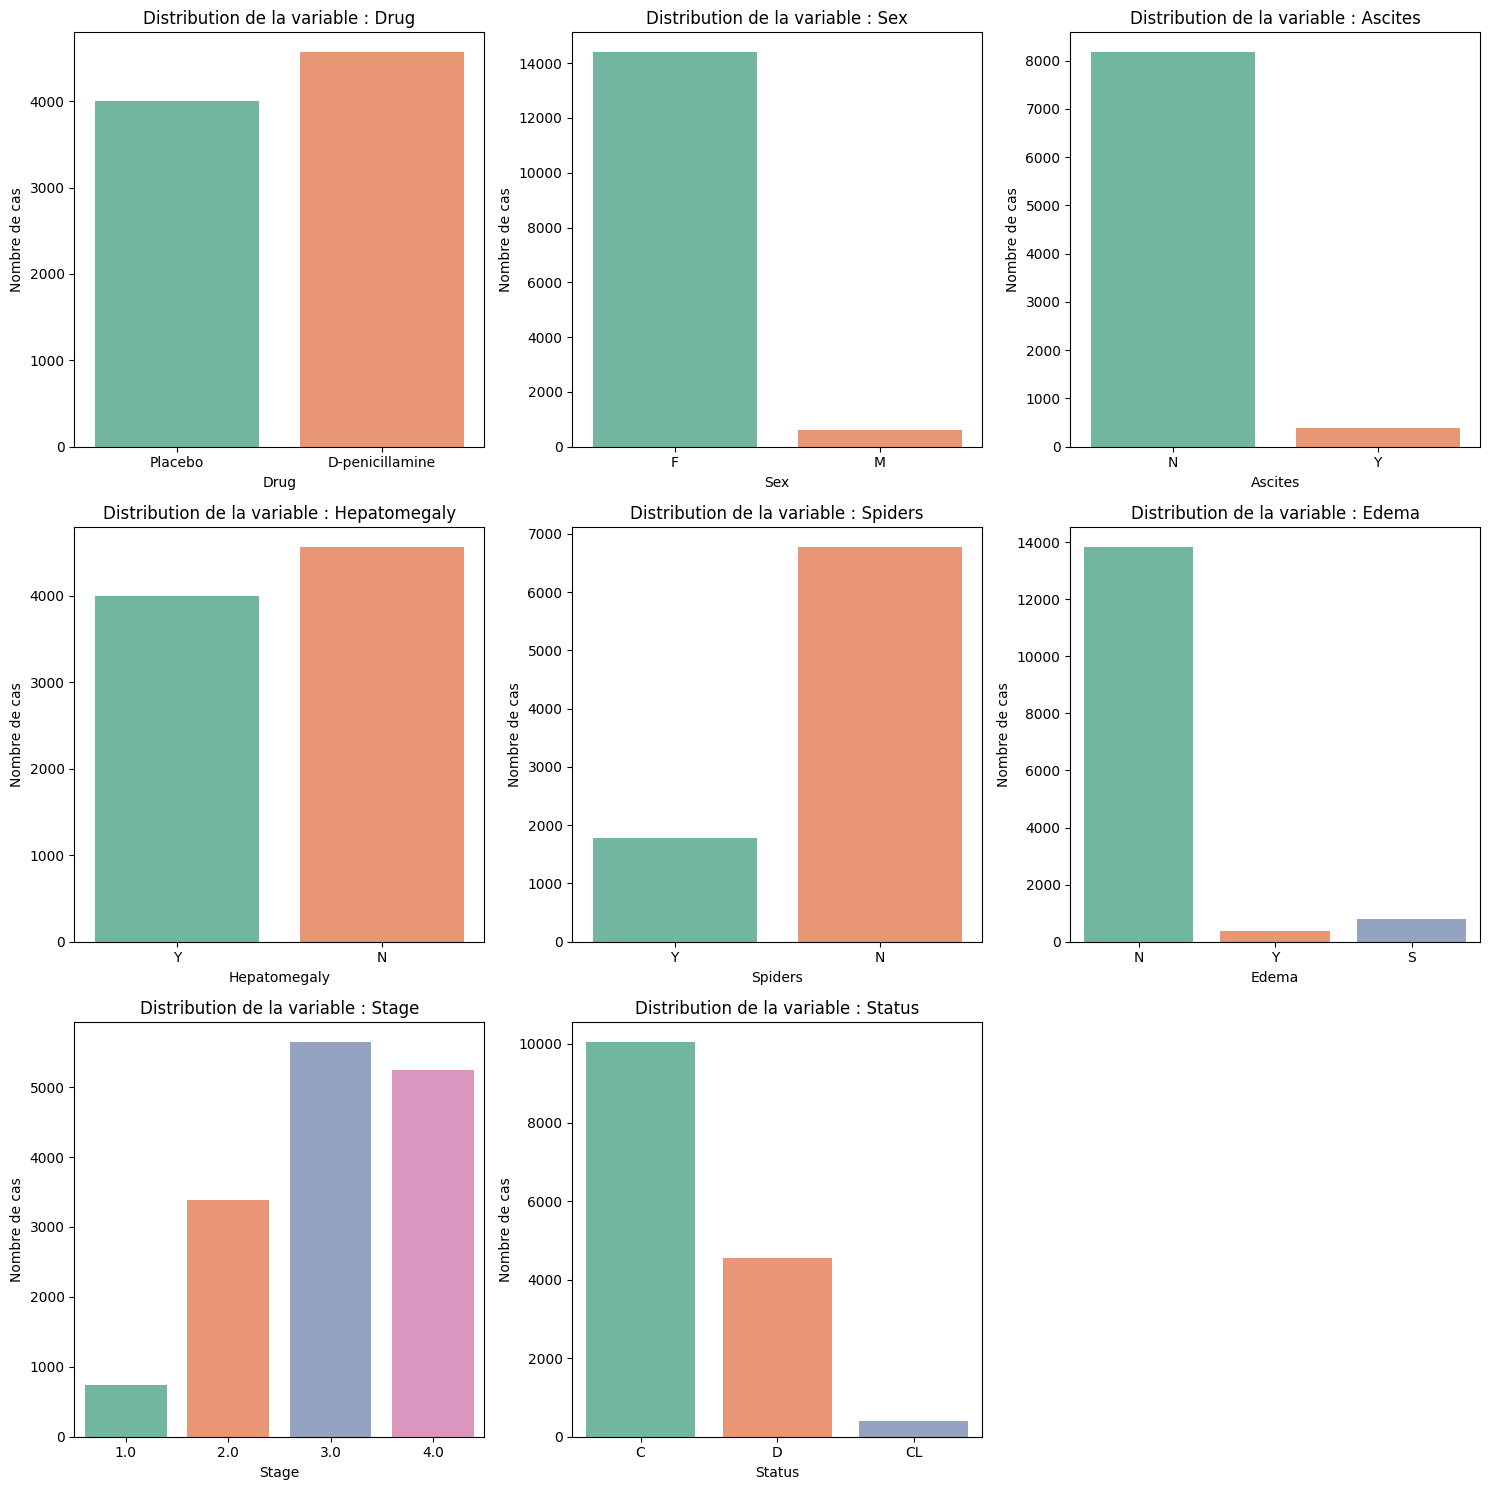

In [209]:
categorical_columns = train_df.select_dtypes(include=['object', 'category']).columns

n_cols = 3
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=col, data=train_df, palette='Set2')  
    plt.title(f'Distribution de la variable : {col}')
    plt.xlabel(col)
    plt.ylabel('Nombre de cas')

plt.tight_layout() 
plt.show()


> 🔍 **Description des graphique :**
>
> **Drug (Médicament) :**
> - Les patients sont répartis en deux groupes : ceux recevant un placebo et ceux recevant de la D-pénicillamine.
> - Le nombre de patients est relativement équilibré entre les deux catégories.
>
> **Sex (Sexe) :**
> - Il y a une très forte majorité de patients de sexe féminin (F) par rapport aux patients de sexe masculin (M).
>
> **Ascites (Ascite) :**
> - Une large majorité des patients ne présentent pas d’ascite (N).
> - Une faible proportion des patients souffrent d’ascite (Y).
>
> **Hepatomegaly (Hépatomégalie) :**
> - La répartition entre les patients ayant une hépatomégalie (Y) et ceux n’en ayant pas (N) est relativement équilibrée, bien qu'un léger avantage soit en faveur des patients sans hépatomégalie.
>
> **Spiders (Angiomes stellaires, ou "Spiders") :**
> - Une majorité de patients ne présentent pas d'angiomes stellaires (N).
> - Une proportion plus faible de patients en ont (Y).
>
> **Edema (Œdème) :**
> - La majorité des patients ne présentent pas d’œdème (N).
> - Une petite proportion souffre d’œdème (Y) ou d’un œdème traité avec des diurétiques (S).
>
> **Stage (Stade de la maladie) :**
> - La distribution des stades montre une augmentation progressive du nombre de cas du stade 1 au stade 3, suivie d’une légère diminution au stade 4.
>
> **Status (Statut du patient) :**
> - La majorité des patients sont classés dans le statut "C".
> - Un nombre plus faible de patients sont en statut "D".
> - Très peu de patients sont classés en "CL".

### 📊 Affichage de toutes les variables continues :

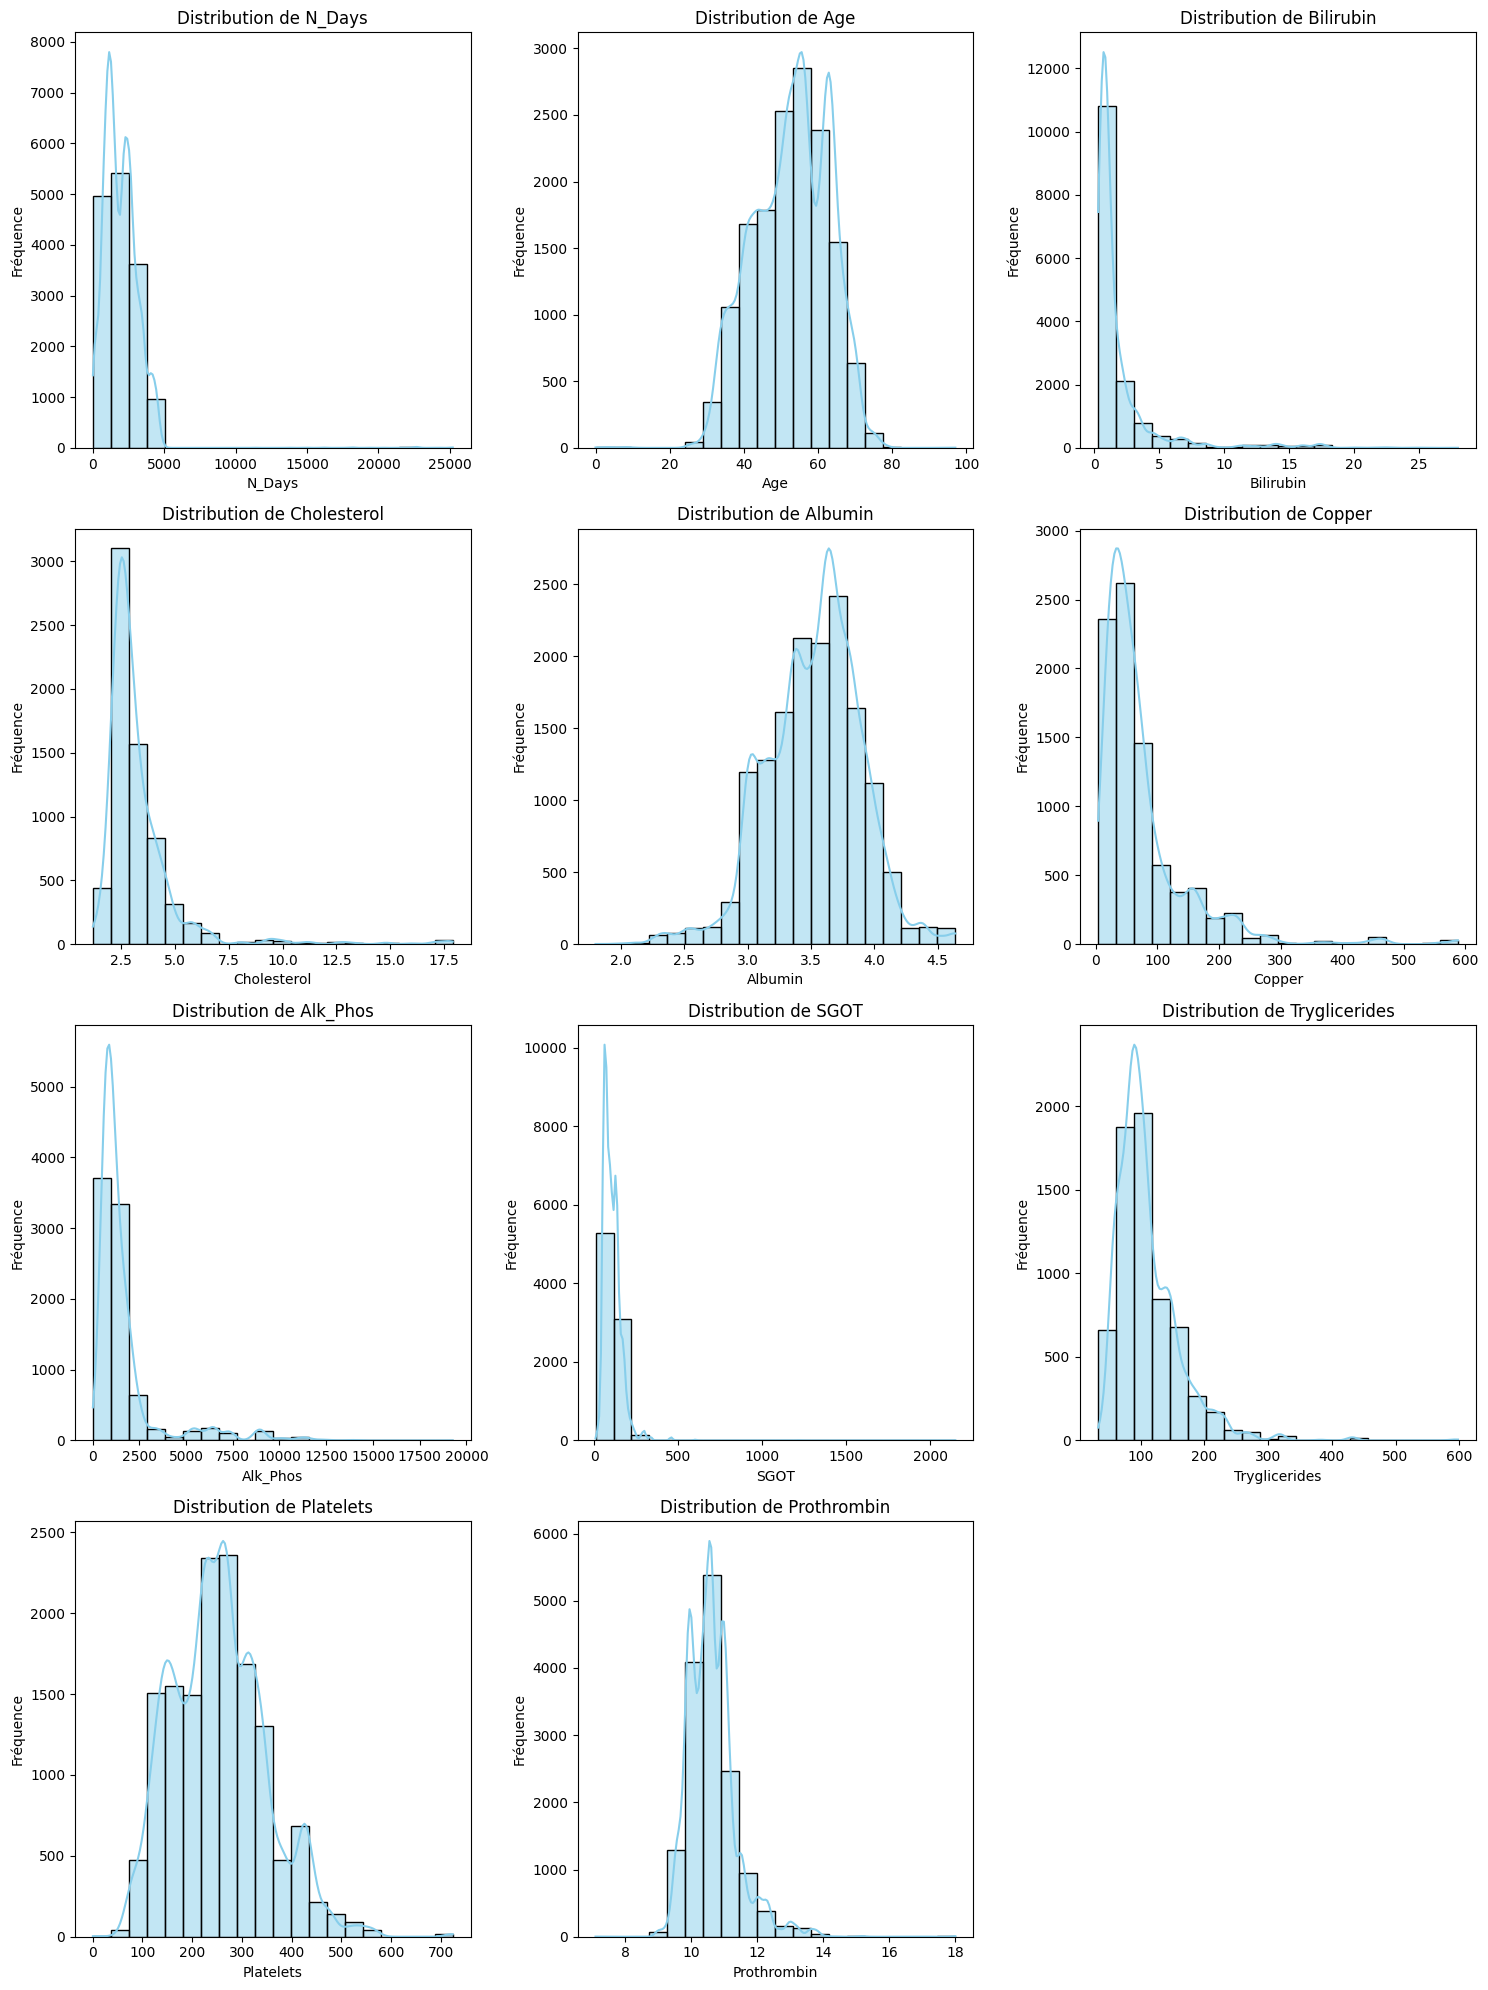

In [210]:
continuous_columns = train_df.select_dtypes(include=['float64', 'int64']).columns
continuous_columns = continuous_columns[continuous_columns != 'id']

n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5)) 

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.histplot(train_df[col], kde=True, color='skyblue', bins=20)  
    plt.title(f'Distribution de {col}')
    plt.xlabel(col)
    plt.ylabel('Fréquence')

plt.tight_layout()  
plt.show()


> 🔍 **Analyse des graphiques** 
>
> **N_Days (Nombre de jours)**
> - Forte asymétrie à droite, avec une concentration élevée des valeurs près de zéro.
> - Quelques valeurs extrêmes très élevées (longue traîne vers la droite).
> - Indique probablement que la plupart des patients ont une durée de suivi courte, mais quelques-uns ont des durées beaucoup plus longues.
>
> **Age (Âge)**
> - Distribution en forme de cloche, proche d'une loi normale.
> - Pic autour de 50 ans, ce qui semble être l'âge médian ou moyen de la population étudiée.
> - Peu de patients très jeunes ou très âgés.
>
> **Bilirubin (Bilirubine)**
> - Distribution fortement asymétrique à droite.
> - La plupart des valeurs sont faibles, mais quelques patients ont des taux de bilirubine très élevés.
> - Indique que la majorité des patients ont des niveaux normaux ou légèrement élevés, mais quelques cas extrêmes ont des niveaux beaucoup plus élevés.
>
> **Cholesterol (Cholestérol)**
> - Distribution également asymétrique à droite.
> - La majorité des patients ont des valeurs basses, mais quelques valeurs très élevées sont présentes.
> - Peut indiquer que certains patients souffrent d'hypercholestérolémie sévère.
>
> **Albumin (Albumine)**
> - Distribution en cloche, proche d'une distribution normale.
> - La plupart des patients ont des niveaux d'albumine autour de 3.5 g/dL.
> - Une faible variabilité autour de cette valeur centrale.
>
> **Copper (Cuivre)**
> - Forte asymétrie à droite.
> - La plupart des patients ont des valeurs faibles, mais quelques-uns ont des niveaux de cuivre très élevés.
> - Peut indiquer un marqueur de maladie spécifique pour un sous-groupe de patients.
>
> **Alk_Phos (Phosphatase Alcaline)**
> - Distribution fortement asymétrique à droite.
> - La majorité des valeurs sont faibles, mais quelques pics très élevés.
> - Indique probablement que certaines conditions pathologiques entraînent une élévation extrême de la phosphatase alcaline.
>
> **SGOT (Aspartate Aminotransférase - Marqueur hépatique)**
> - Distribution asymétrique à droite.
> - Une grande partie des patients a des valeurs faibles, mais quelques cas extrêmes ont des valeurs très élevées.
> - Indique une atteinte hépatique sévère chez certains patients.
>
> **Triglycerides (Triglycérides)**
> - Distribution asymétrique à droite.
> - La plupart des patients ont des niveaux modérés, mais quelques valeurs très élevées existent.
> - Suggère une variabilité importante dans le métabolisme lipidique.
>
> **Platelets (Plaquettes)**
> - Distribution en cloche, légèrement asymétrique à gauche.
> - Valeur médiane autour de 250 000 plaquettes/μL.
> - Indique une variabilité modérée entre les patients.
>
> **Prothrombin (Temps de Prothrombine)**
> - Distribution en cloche.
> - La plupart des patients ont des valeurs proches de 10-12 secondes.
> - Peut indiquer une relative homogénéité de cette variable.
>
> => Plusieurs variables (Age, Albumin, Prothrombin, Platelets) suivent une distribution normale ou en cloche.
>     D'autres variables (Bilirubin, Cholesterol, Copper, Alk_Phos, SGOT, Triglycerides, N_Days) présentent une forte asymétrie à droite, indiquant que la plupart des patients ont des valeurs normales, mais quelques cas extrêmes existent avec des niveaux très élevés.


### 📊 Affichage des boxplots de toutes les variables continues :

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/350439153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/350439153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/350439153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df[col], palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/350439

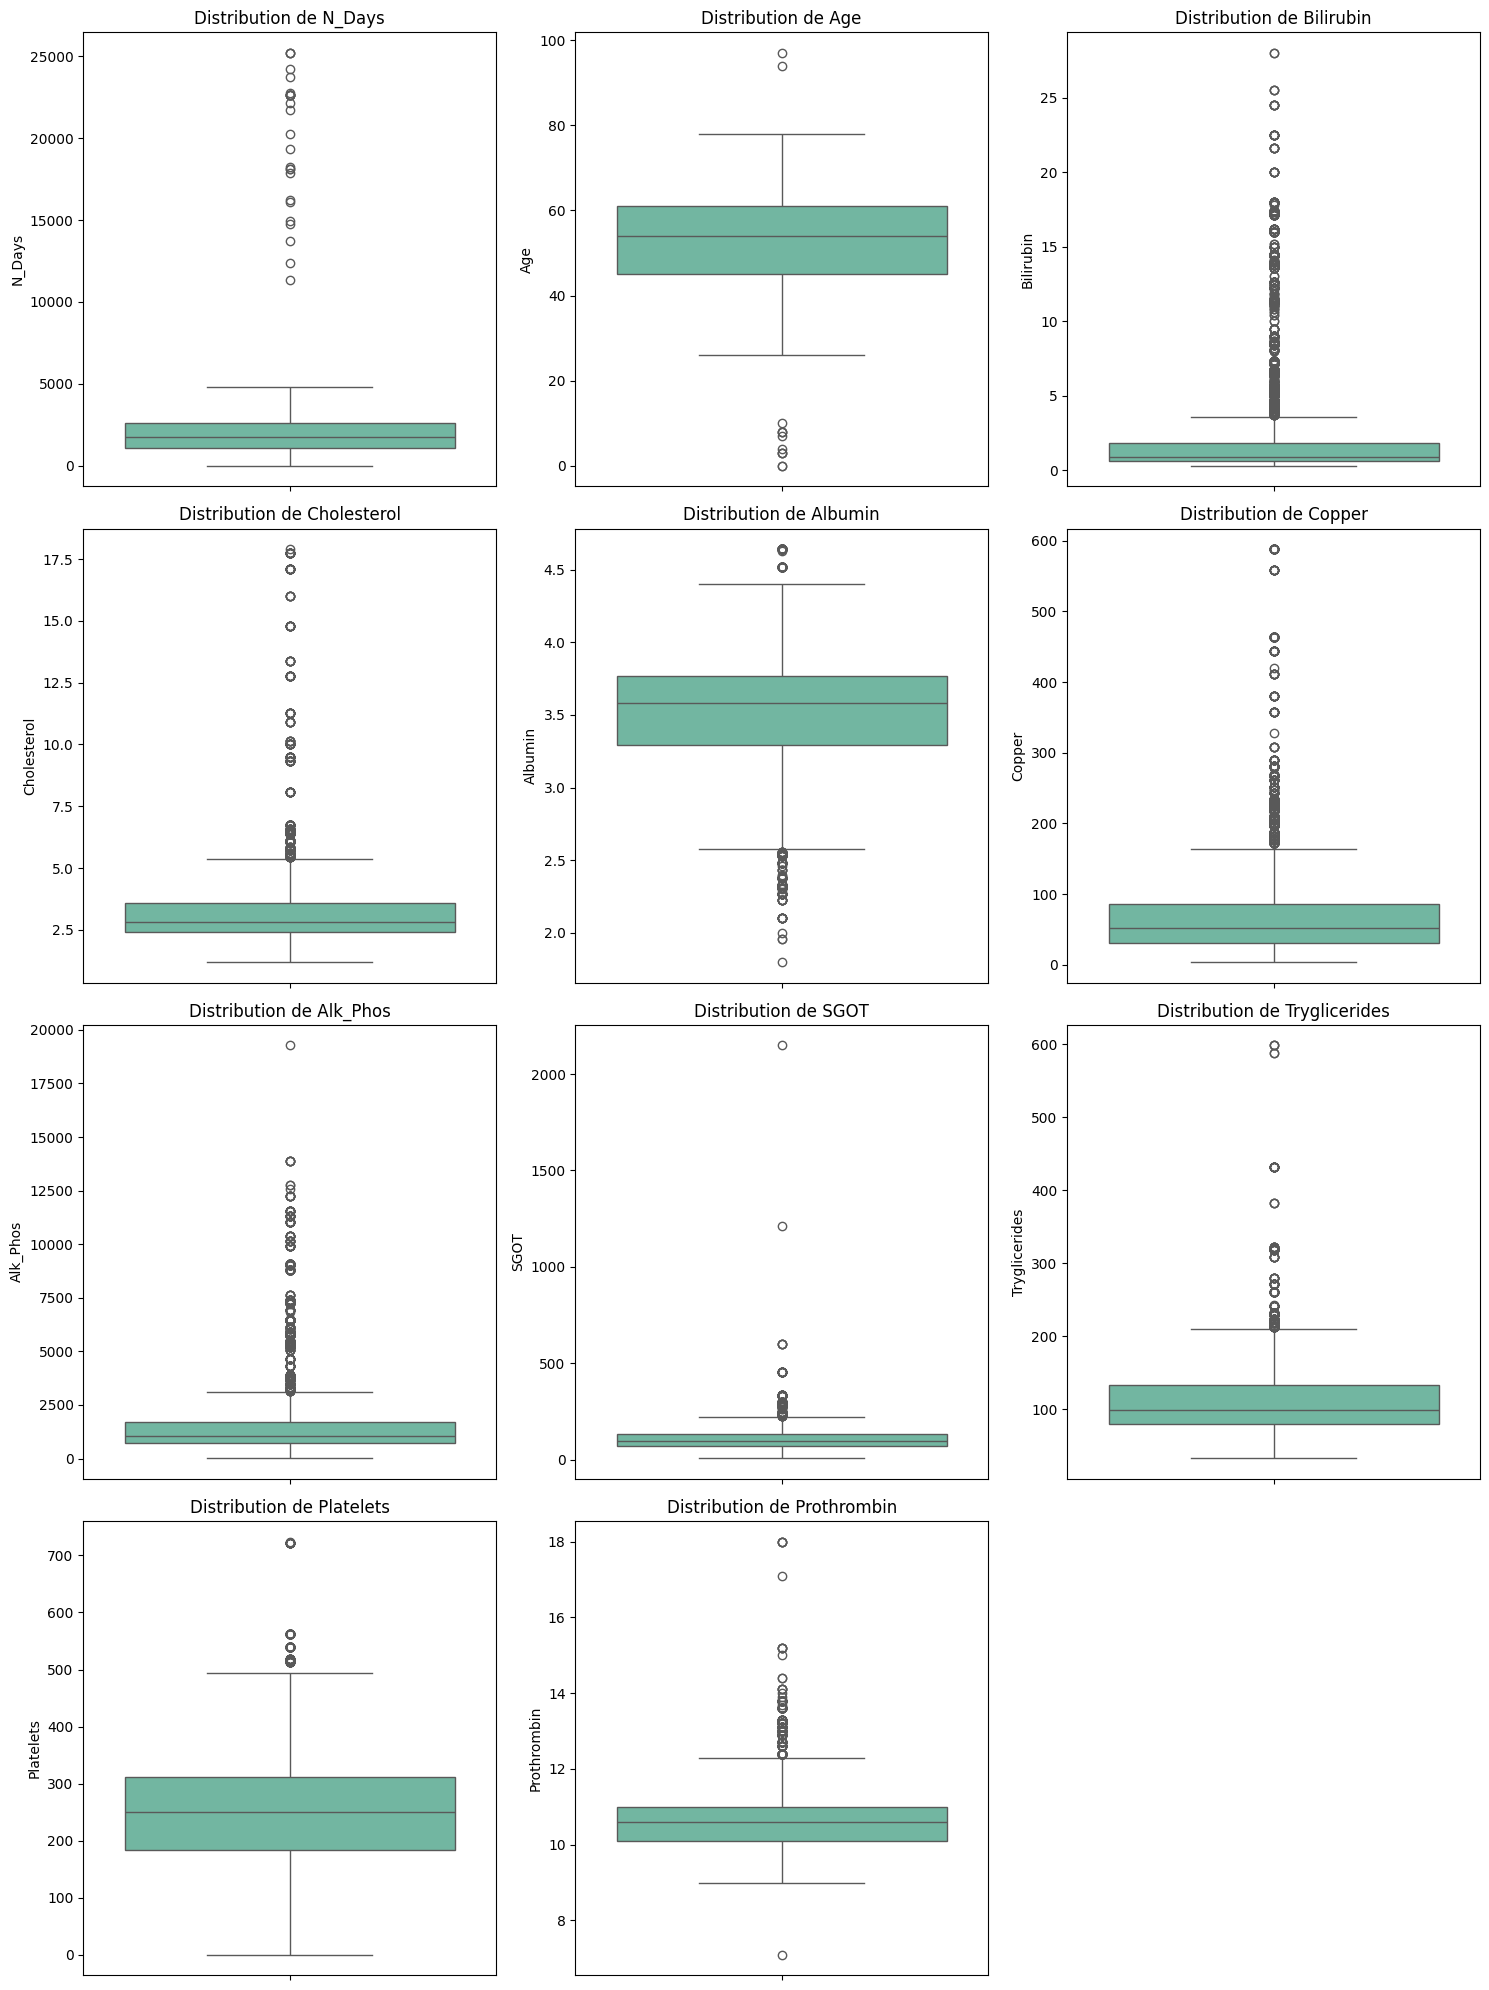

In [211]:
n_cols = 3
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 5, n_rows * 5))

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1) 
    sns.boxplot(y=train_df[col], palette='Set2')  
    plt.title(f'Distribution de {col}')
    plt.ylabel(col)

plt.tight_layout()

plt.show()


>🔍 **Analyse des boxplots**
>
>**Distribution de N_Days :**
>- La majorité des valeurs sont concentrées autour de la médiane, avec quelques valeurs aberrantes élevées.
>- La distribution semble asymétrique avec une longue queue vers les valeurs élevées.
>
>**Distribution de l'Âge :**
>- Les âges sont principalement regroupés autour de la médiane, avec quelques valeurs aberrantes plus jeunes et plus âgées.
>- La distribution est relativement uniforme avec des extrêmes visibles.
>
>**Distribution de la Bilirubine :**
>- La plupart des valeurs sont proches de zéro, avec quelques valeurs aberrantes élevées.
>- La distribution est fortement asymétrique avec une concentration près de la valeur minimale.
>
>**Distribution du Cholestérol :**
>- Les valeurs sont concentrées autour de la médiane, avec quelques valeurs aberrantes élevées.
>- La distribution est asymétrique avec une queue vers les valeurs élevées.
>
>**Distribution de l'Albumine :**
>- Les valeurs sont principalement regroupées autour de la médiane, avec quelques valeurs aberrantes basses.
>- La distribution est relativement uniforme avec des extrêmes visibles.
>
>**Distribution du Cuivre :**
>- La plupart des valeurs sont proches de la médiane, avec quelques valeurs aberrantes élevées.
>- La distribution est asymétrique avec une concentration près de la valeur médiane.
>
>**Distribution de la Phosphatase Alcaline (Alk_Phos) :**
>- Les valeurs sont concentrées autour de la médiane, avec quelques valeurs aberrantes élevées.
>- La distribution est asymétrique avec une queue vers les valeurs élevées.
>
>**Distribution du SGOT :**
>- Les valeurs sont principalement regroupées autour de la médiane, avec quelques valeurs aberrantes élevées.
>- La distribution est relativement uniforme avec des extrêmes visibles.
>
>**Distribution des Triglycérides :**
>- La plupart des valeurs sont proches de la médiane, avec quelques valeurs aberrantes élevées.
>- La distribution est asymétrique avec une concentration près de la valeur médiane.
>
>**Distribution des Plaquettes :**
>- Les valeurs sont concentrées autour de la médiane, avec quelques valeurs aberrantes basses et élevées.
>- La distribution est relativement uniforme avec des extrêmes visibles.
>
>**Distribution de la Prothrombine :**
>- Les valeurs sont principalement regroupées autour de la médiane, avec quelques valeurs aberrantes basses et élevées.
>- La distribution est relativement uniforme avec des extrêmes visibles.


## <span style="color:blue">🔷 Analyse multivariée</span>

### 📊 Affichage de toutes les variables catégorielles en fonction de la variable cible :

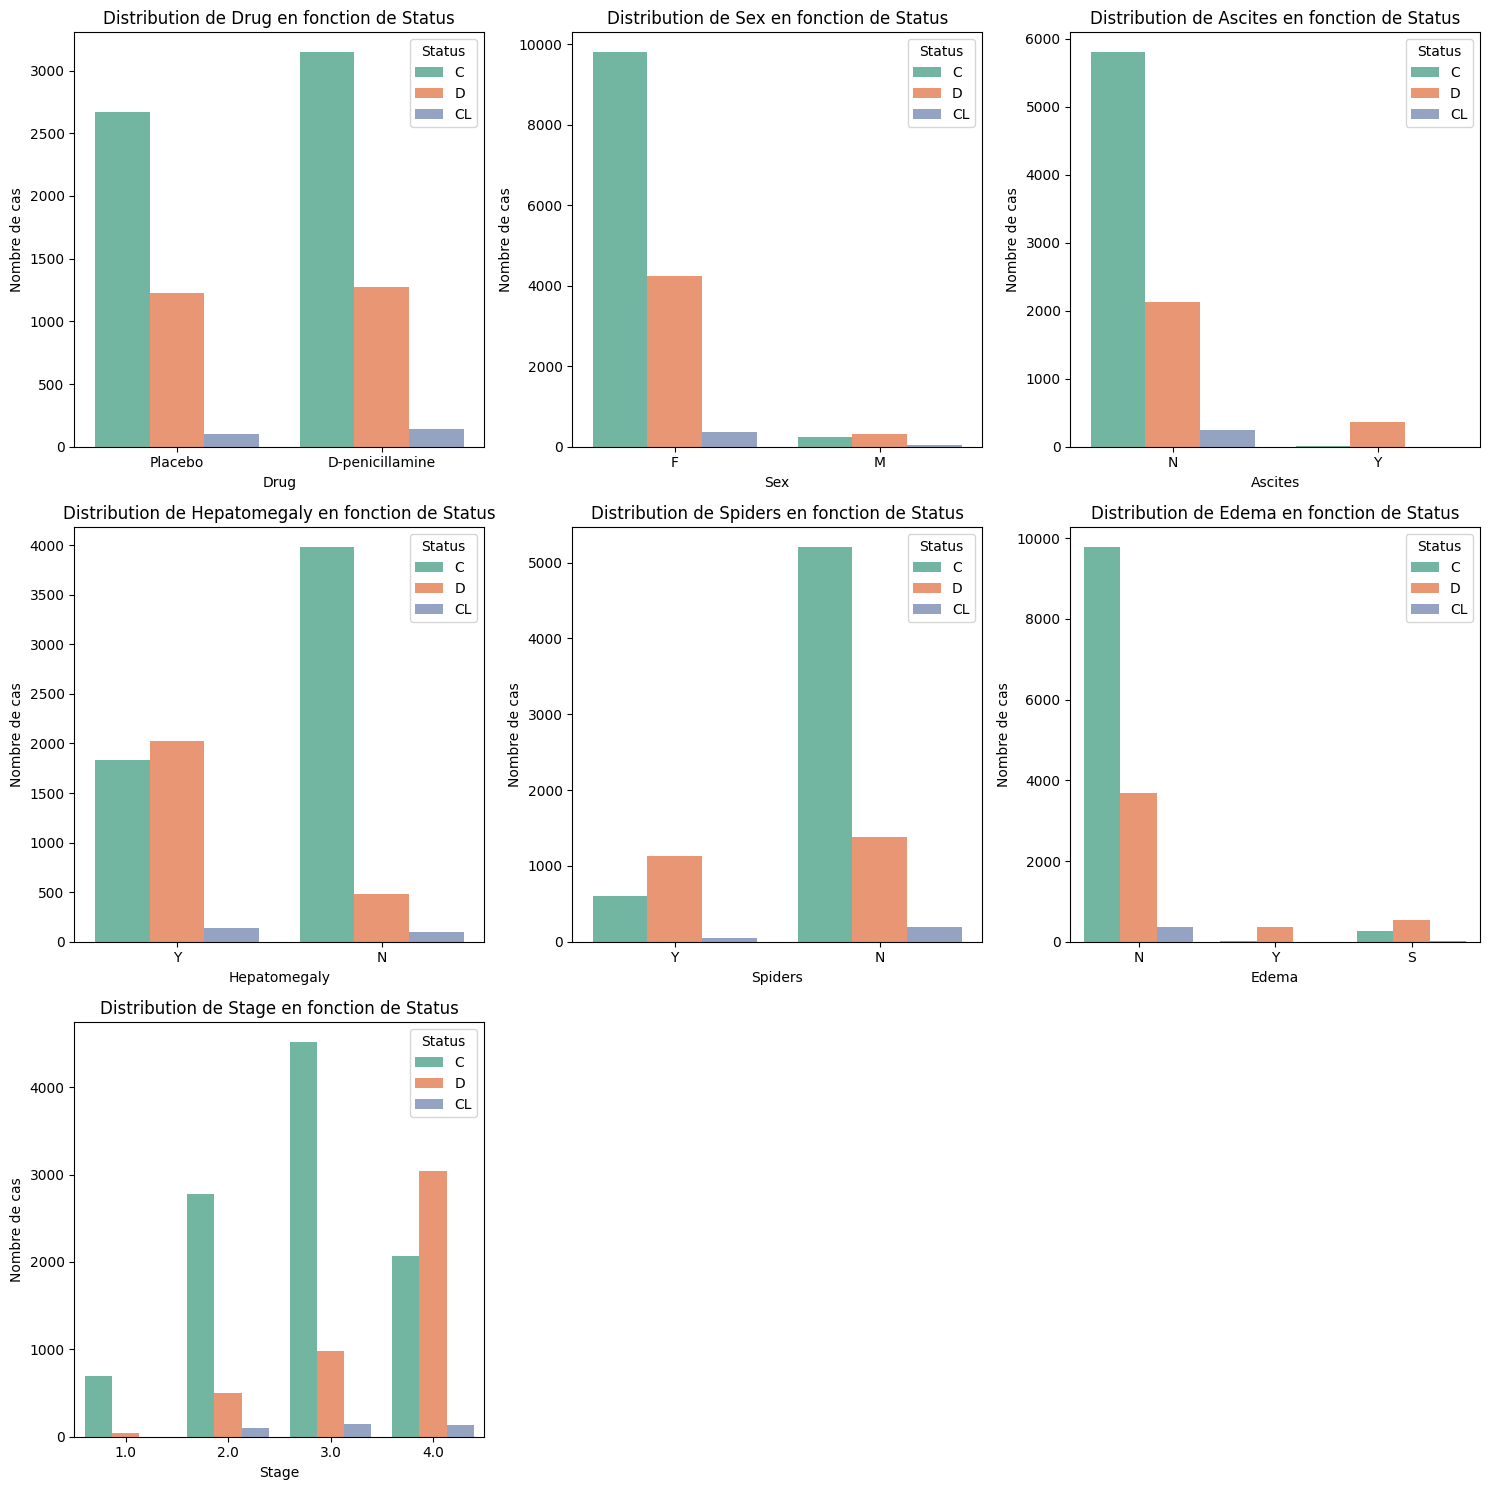

In [212]:
# Retirer la variable cible 'Status' de la liste des variables catégorielles
categorical_columns = categorical_columns[categorical_columns != 'Status']

n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.countplot(x=col, hue='Status', data=train_df, palette='Set2')  
    plt.title(f'Distribution de {col} en fonction de Status')
    plt.xlabel(col)
    plt.ylabel('Nombre de cas')

plt.tight_layout()  
plt.show()


> 🔍 **Analyse des graphiques** 
>
> **Drug (Médicament) et Status**
> - La majorité des patients dans tous les statuts (C, D, CL) ont reçu de la D-pénicillamine, avec une répartition similaire à ceux ayant pris un placebo.
> - Le nombre de patients sous statut C est largement supérieur aux autres statuts pour les deux types de traitements 
>   (mais cela est logique car la majorité des patients sont en statut C).
>
> **Sex (Sexe) et Status**
> - Il y a une prédominance féminine dans toutes les catégories de statut.
> - Peu d’hommes sont présents, et la majorité appartient au statut C.
>
> **Ascites (Ascite) et Status**
> - La plupart des patients n’ont pas d’ascite (N). Le fait de ne pas avoir d'ascite semble être plus fréquent dans le statut C.
> - Parmi ceux qui en ont (Y), la majorité est dans le statut D.
> - Très peu de patients en statut CL présentent une ascite.
> -> Le fait de ne pas avoir d'ascite semble etre plus frequant pour le statut C
>   (L'ascite semble être un facteur important pour distinguer les statuts C et D).
>
> **Hepatomegaly (Hépatomégalie) et Status**
> - Une proportion significative de patients avec hépatomégalie (Y) appartient aux statuts C et D.
> - Le statut C contient également une large part de patients sans hépatomégalie (N).
>
> **Spiders (Angiomes stellaires) et Status**
> - Une majorité de patients ne présentent pas d’angiomes stellaires (N), principalement en statut C.
> - Ceux qui en ont (Y) sont plus représentés dans le statut D, bien que leur nombre reste faible.
> -> le fait de ne pas avoir d'angiomes stellaires semble être plus fréquent dans le statut C.
>
> **Edema (Œdème) et Status**
> - La majorité des patients n’ont pas d’œdème (N), et ils appartiennent majoritairement au statut C.
> - Les patients avec œdème (Y ou S) sont plus nombreux dans le statut D, indiquant une probable progression de la maladie.
> -> le fait de ne pas avoir d'œdème semble être plus fréquent dans le statut C.
>
> **Stage (Stade de la maladie) et Status**
> - Plus le niveau de stade est élevé, plus le nombre de patients en statut D augmente.
> - Dans toutes les gravités de maladies, le statut C est le plus représenté, sauf dans le stade 4 (le pire) où le statut D est le plus fréquent.
> - Très peu de patients en statut CL sont présents, quelle que soit la gravité de la maladie.
>
> => Chaque variable semble être un facteur important pour distinguer les statuts C et D, mais il est difficile de dire si elles sont indépendantes les unes des autres.

### 📊 Affichage de toutes les variables continues en fonction de la variable cible 

In [213]:
def plot_var_continues(continuous_columns, train_df, hue_var="Status"):
    # Définir la taille de la figure principale
    num_vars = len(continuous_columns)  # Nombre de variables
    rows = (num_vars // 3) + (num_vars % 3 > 0)  # Calculer le nombre de lignes (3 colonnes par défaut)
    plt.figure(figsize=(21, 7 * rows))  # Taille ajustée en fonction des lignes
    
    for i, var in enumerate(continuous_columns[:-1], start=1):  # Commence à 1 pour l'index des sous-graphiques
        plt.subplot(rows, 3, i)
        
        # Tracer le kdeplot
        sns.kdeplot(
            data=train_df, 
            x=var, 
            hue=hue_var, 
            fill=True, 
            palette="Purples", 
            common_norm=True
        )
        sns.despine(top=True, right=True, bottom=True, left=True)  # Supprime les cadres inutiles
        plt.tick_params(axis="both", which="both", bottom=False, top=False, left=False)
        plt.xlabel("")  # Supprimer les labels des x
        plt.title(var, fontsize=14)  # Ajouter un titre pour chaque graphique
    
    # Afficher tous les graphiques ensemble
    plt.tight_layout()
    plt.show()


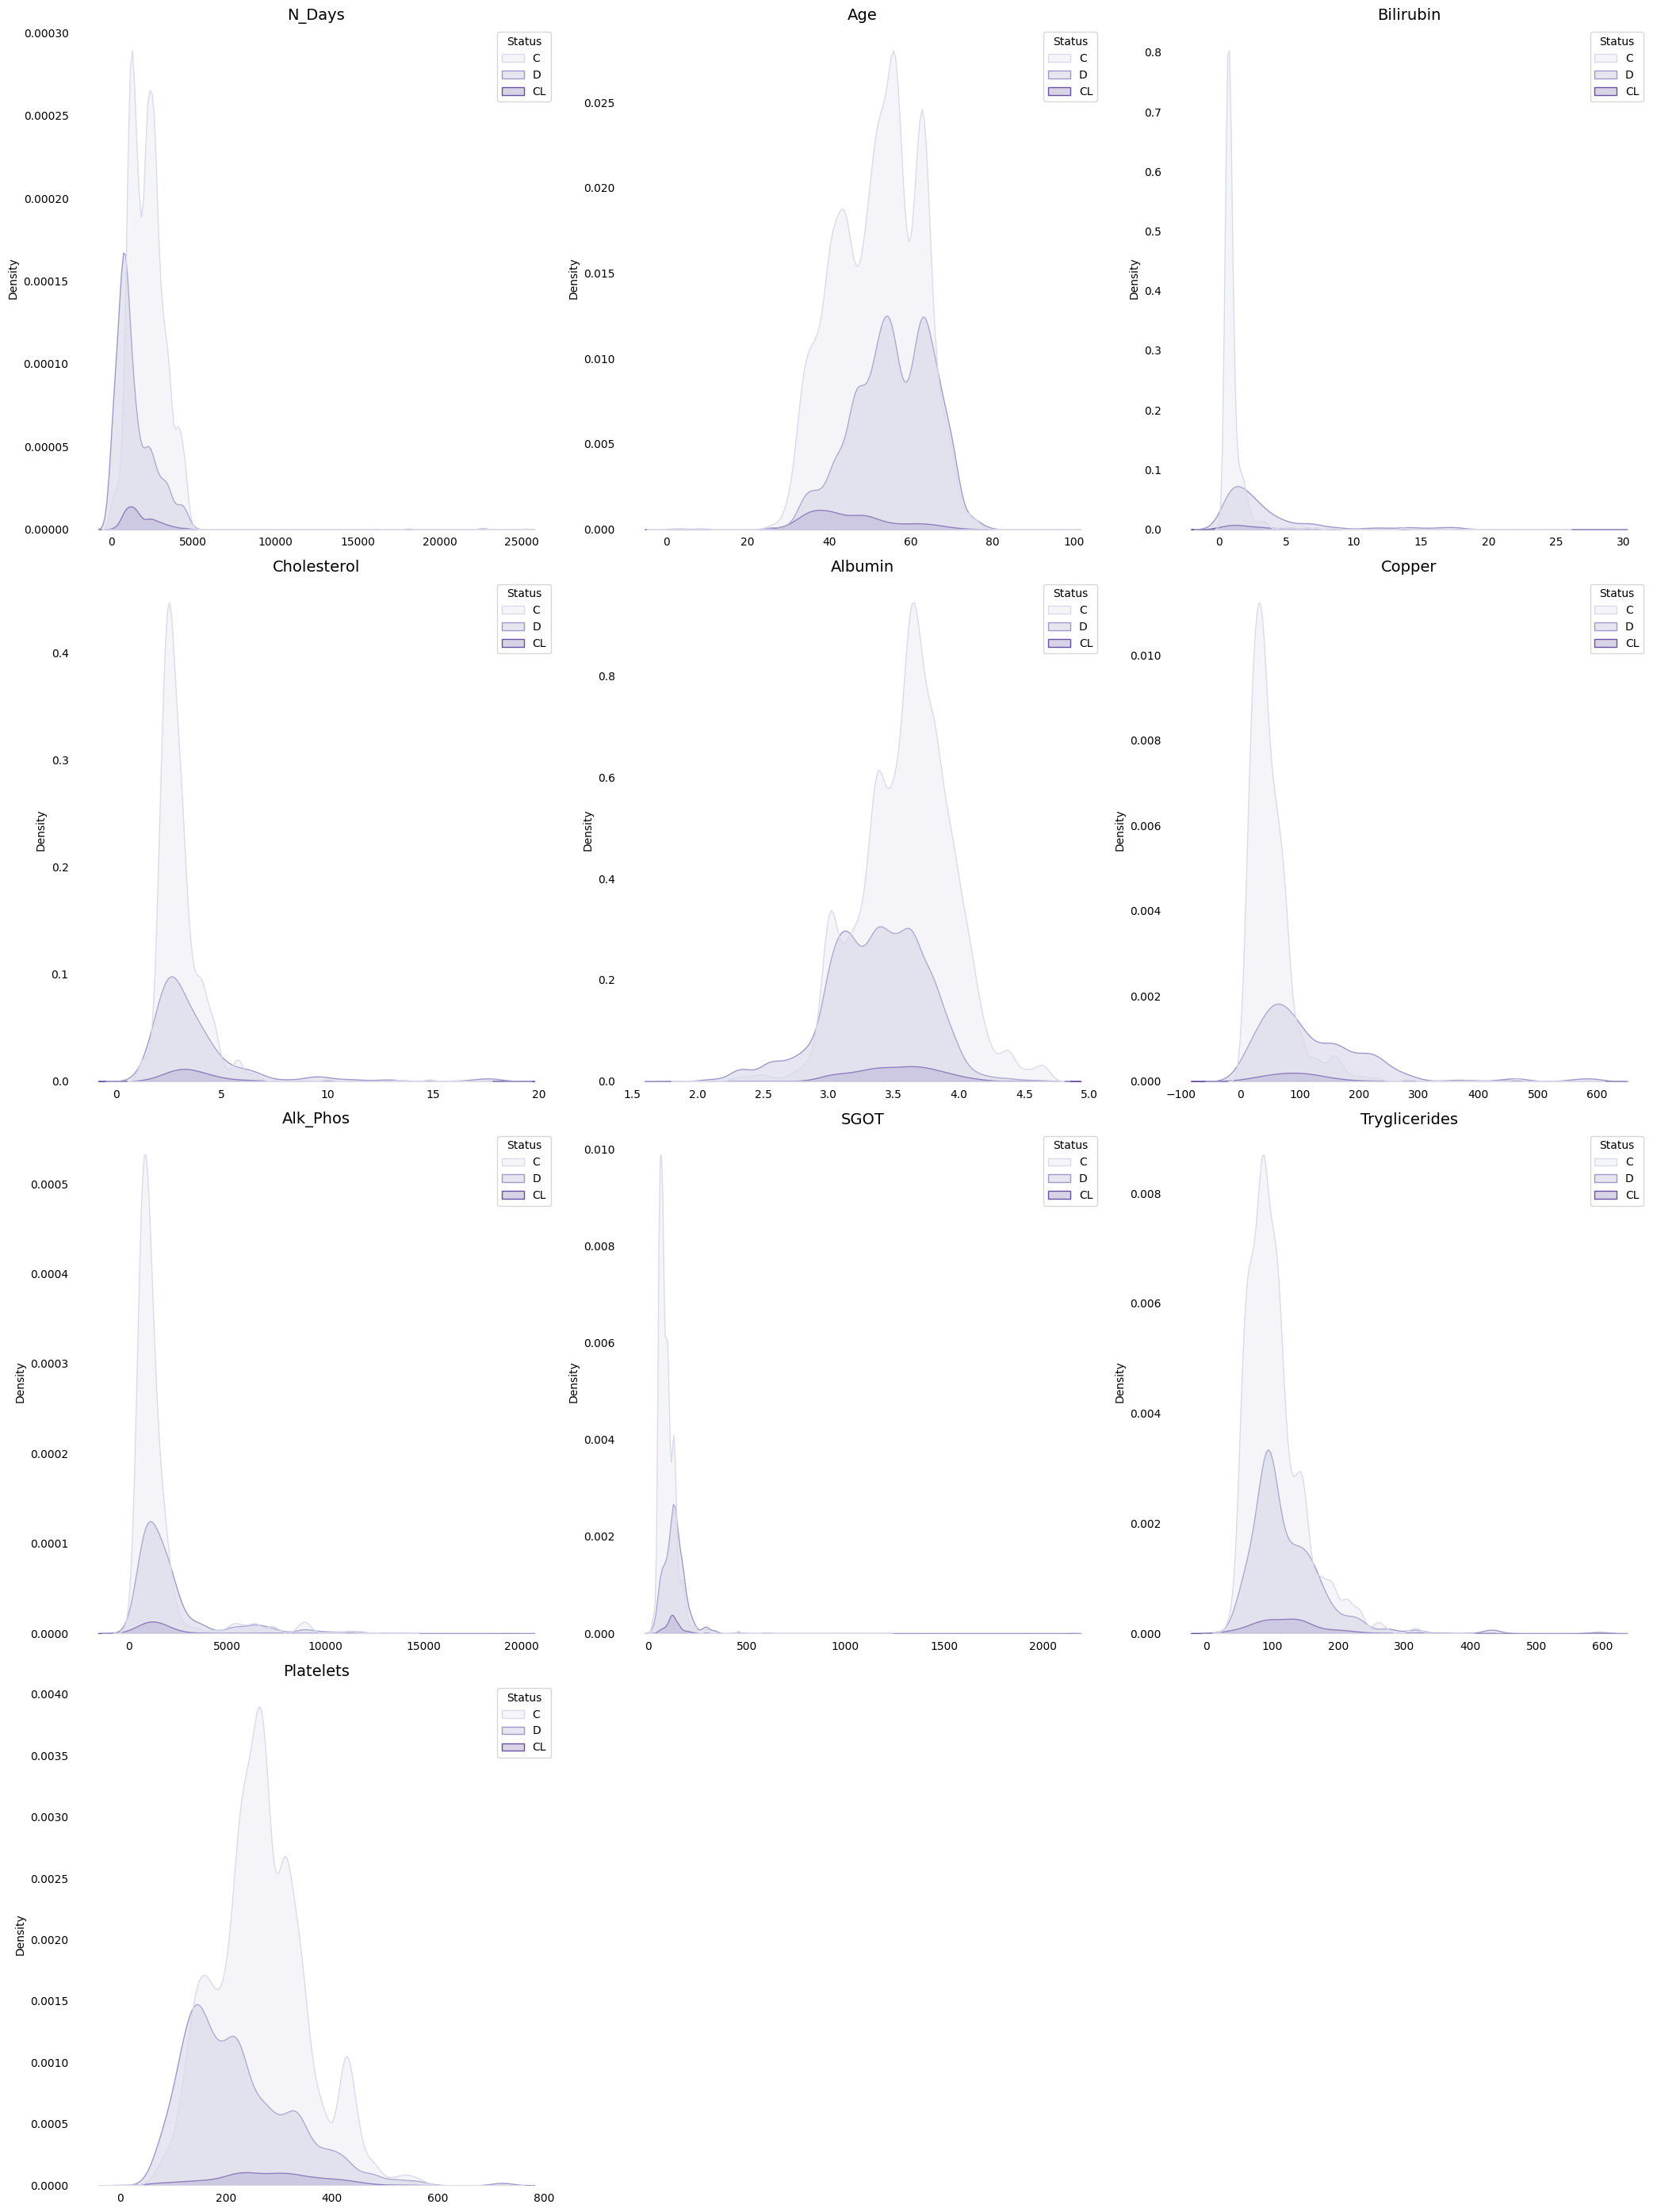

In [214]:
plot_var_continues(continuous_columns, train_df, hue_var="Status")

>🔍 **Analyse des graphiques de densité**
>
>**Distribution de N_Days :**
>- La densité est fortement concentrée autour des valeurs basses, avec une longue queue s'étendant vers les valeurs élevées.
>- La distribution semble asymétrique avec une majorité de valeurs proches de zéro.
>
>**Distribution de l'Âge :**
>- La densité montre deux pics distincts, indiquant une bimodalité dans la distribution des âges.
>- Les âges sont principalement regroupés autour de deux intervalles distincts.
>
>**Distribution de la Bilirubine :**
>- La densité est fortement concentrée autour des valeurs basses, avec une queue s'étendant vers les valeurs élevées.
>- La distribution est asymétrique avec une majorité de valeurs proches de zéro.
>
>**Distribution du Cholestérol :**
>- La densité est concentrée autour des valeurs basses, avec une queue s'étendant vers les valeurs élevées.
>- La distribution est asymétrique avec une majorité de valeurs proches de la valeur minimale.
>
>**Distribution de l'Albumine :**
>- La densité montre un pic distinct autour de la valeur médiane, indiquant une concentration des valeurs autour de cette région.
>- La distribution est relativement symétrique avec des queues modérées de chaque côté.
>
>**Distribution du Cuivre :**
>- La densité est fortement concentrée autour des valeurs basses, avec une queue s'étendant vers les valeurs élevées.
>- La distribution est asymétrique avec une majorité de valeurs proches de la valeur minimale.
>
>**Distribution de la Phosphatase Alcaline (Alk_Phos) :**
>- La densité est concentrée autour des valeurs basses, avec une queue s'étendant vers les valeurs élevées.
>- La distribution est asymétrique avec une majorité de valeurs proches de la valeur minimale.
>
>**Distribution du SGOT :**
>- La densité montre un pic distinct autour de la valeur médiane, indiquant une concentration des valeurs autour de cette région.
>- La distribution est relativement symétrique avec des queues modérées de chaque côté.
>
>**Distribution des Triglycérides :**
>- La densité est fortement concentrée autour des valeurs basses, avec une queue s'étendant vers les valeurs élevées.
>- La distribution est asymétrique avec une majorité de valeurs proches de la valeur minimale.
>
>**Distribution des Plaquettes :**
>- La densité montre un pic distinct autour de la valeur médiane, indiquant une concentration des valeurs autour de cette région.
>- La distribution est relativement symétrique avec des queues modérées de chaque côté.
>
>**Distribution de la Prothrombine :**
>- La densité est concentrée autour des valeurs basses, avec une queue s'étendant vers les valeurs élevées.
>- La distribution est asymétrique avec une majorité de valeurs proches de la valeur minimale.


### 📊 Affichage des boxplots de toutes les variables continues en fonction de la variable cible :

/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/4161465305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/4161465305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=train_df, palette='Set2')
/var/folders/74/x3782kls1rv6qscx40xcj5rm0000gn/T/ipykernel_4091/4161465305.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Status', y=col, data=train_df, palette='Set2')
/var/folders/74/

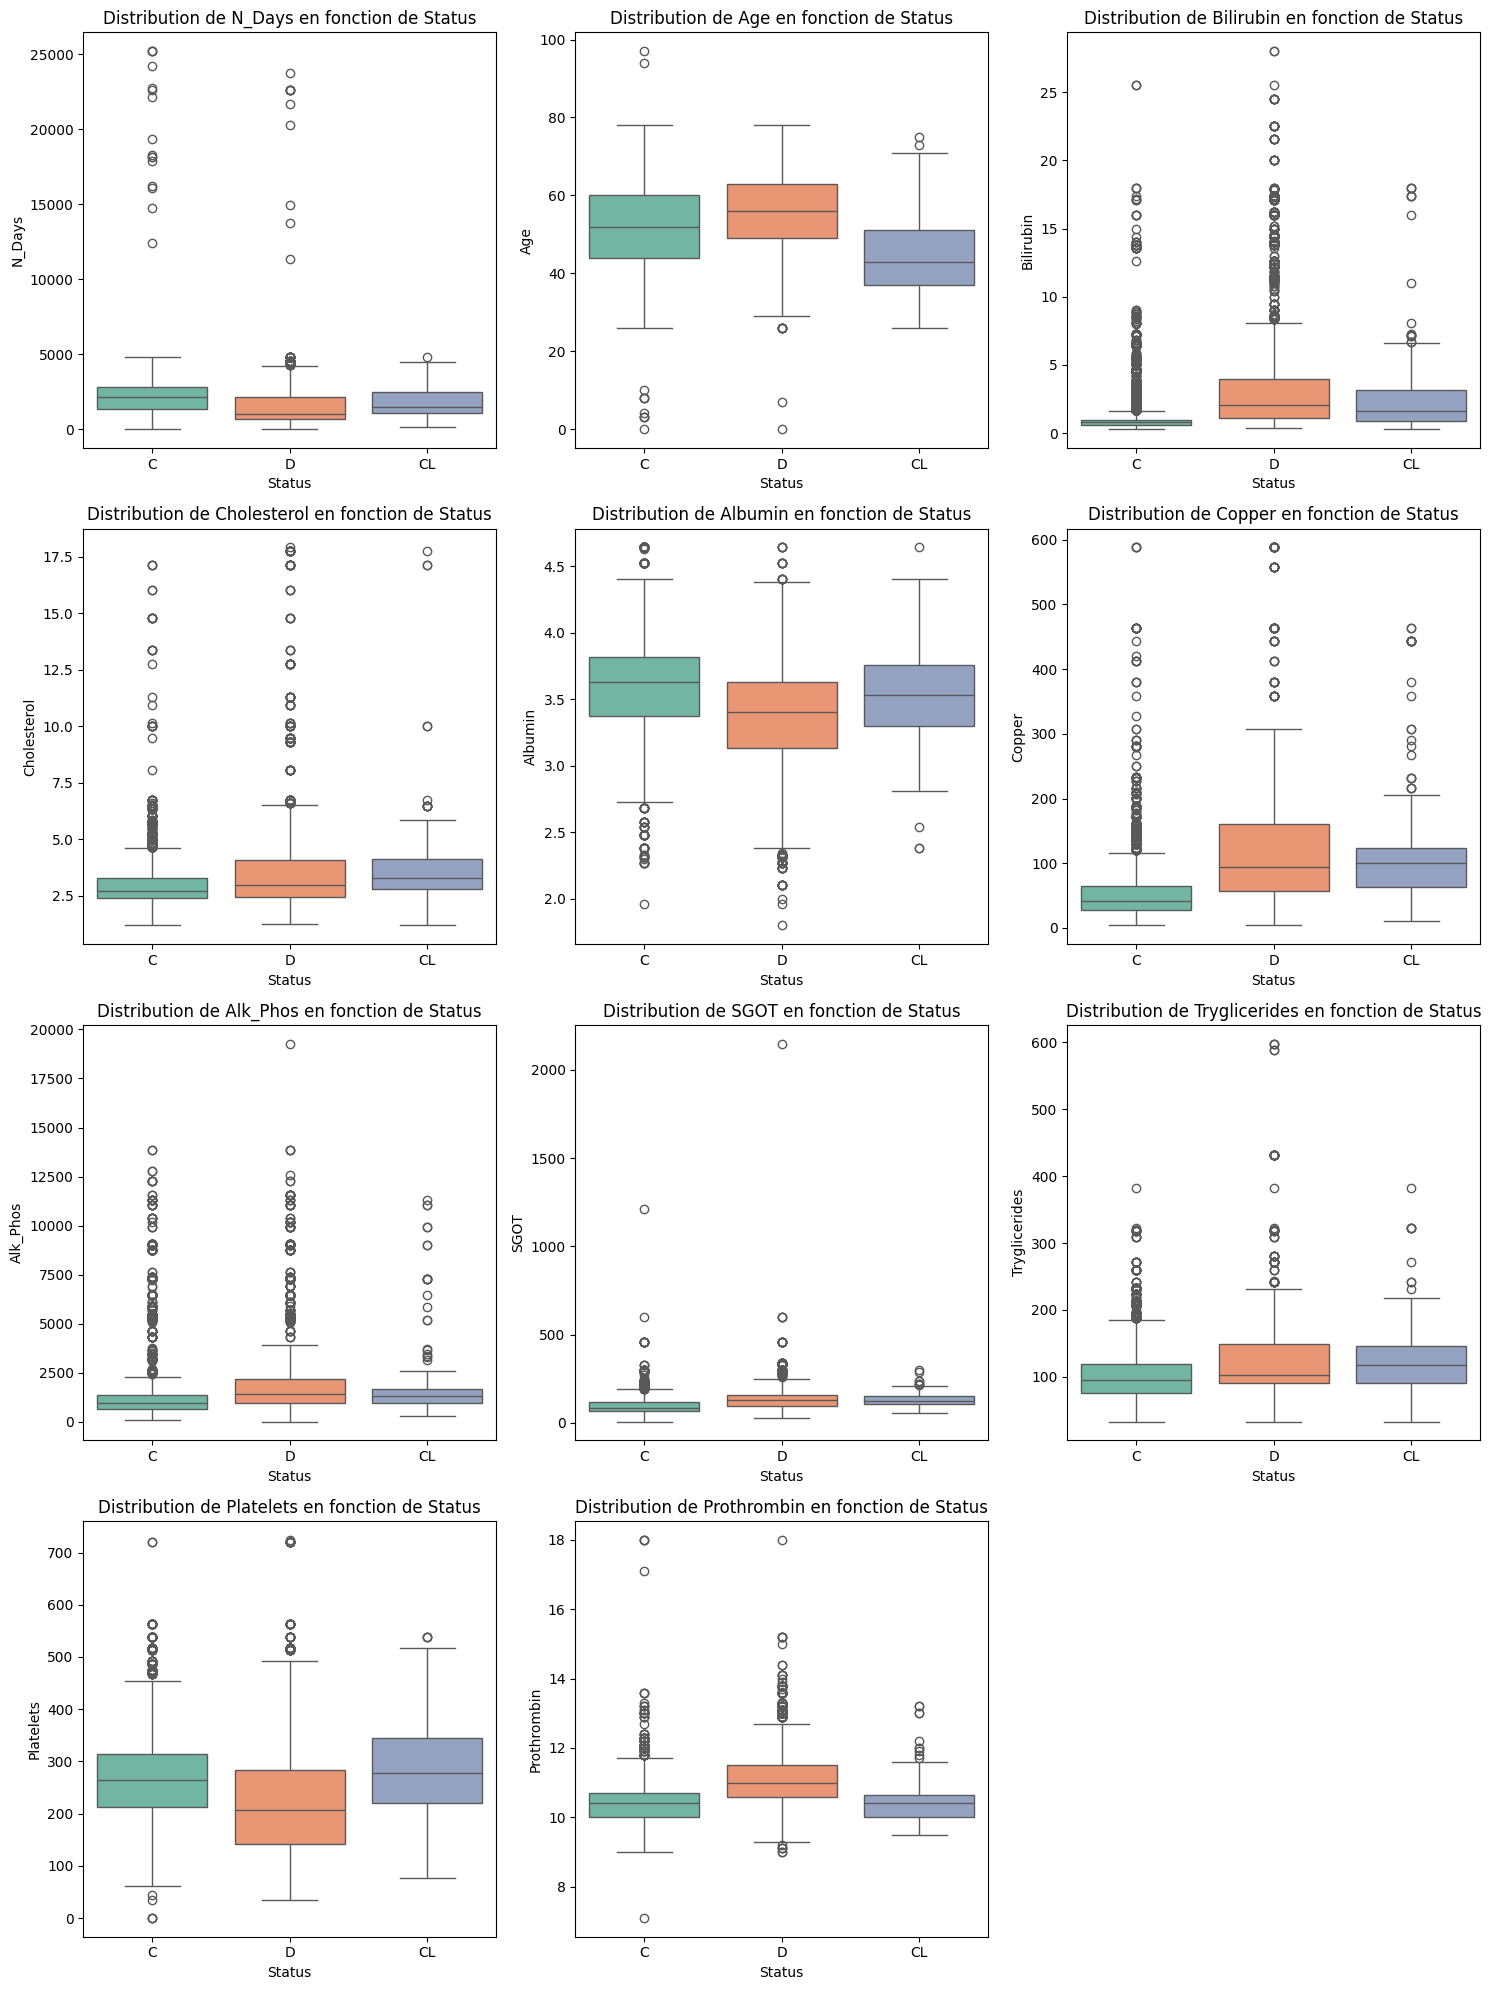

In [215]:
n_cols = 3  # Nombre de colonnes par ligne
n_rows = (len(continuous_columns) + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

plt.figure(figsize=(n_cols * 5, n_rows * 5))  

for i, col in enumerate(continuous_columns):
    plt.subplot(n_rows, n_cols, i + 1)  
    sns.boxplot(x='Status', y=col, data=train_df, palette='Set2') 
    plt.title(f'Distribution de {col} en fonction de Status')
    plt.xlabel('Status')
    plt.ylabel(col)

plt.tight_layout()  
plt.show()


>🔍 **Analyse des boxplots en fonction du statut**
>
>**Distribution de N_Days en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions plus compactes avec moins de valeurs aberrantes.
>
>**Distribution de l'Âge en fonction de Statut :**
>- Les âges sont plus dispersés pour le statut C, avec des valeurs aberrantes plus jeunes et plus âgées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution de la Bilirubine en fonction de Statut :**
>- La plupart des valeurs sont proches de zéro pour tous les statuts, avec quelques valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions similaires avec des valeurs aberrantes.
>
>**Distribution du Cholestérol en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution de l'Albumine en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes basses.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution du Cuivre en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution de la Phosphatase Alcaline (Alk_Phos) en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution du SGOT en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution des Triglycérides en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution des Plaquettes en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes basses et élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.
>
>**Distribution de la Prothrombine en fonction de Statut :**
>- Les valeurs sont plus dispersées pour le statut C, avec des valeurs aberrantes basses et élevées.
>- Les statuts D et CL montrent des distributions plus compactes et similaires.


### 📊 Interprétation de la Matrice de Corrélation  


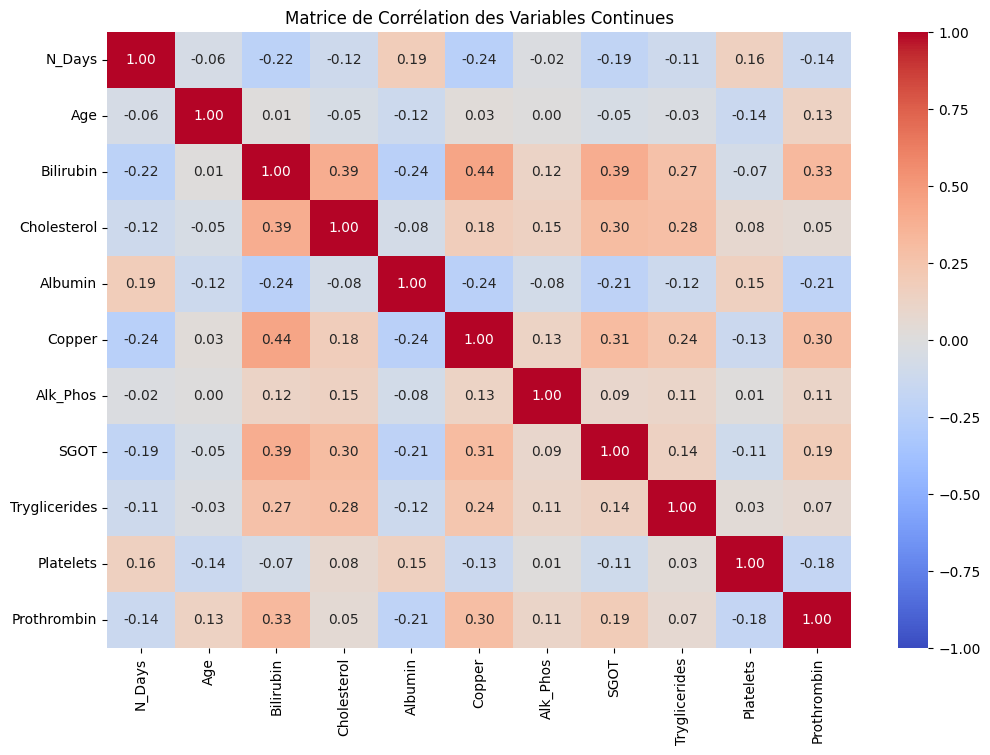

In [216]:
corr_matrix = train_df[continuous_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matrice de Corrélation des Variables Continues')
plt.show()


> 🔍 **Analyse des Corrélations**
> 
> Certaines variables montrent des **relations significatives**, mais globalement, les corrélations restent **faibles à modérées**.
>
> 🔹 **Corrélations Modérées :**  
> - **Bilirubin & Copper (0.44)**
> - **Bilirubin & Prothrombin (0.33)**
> - **Bilirubin & SGOT (0.39)**  


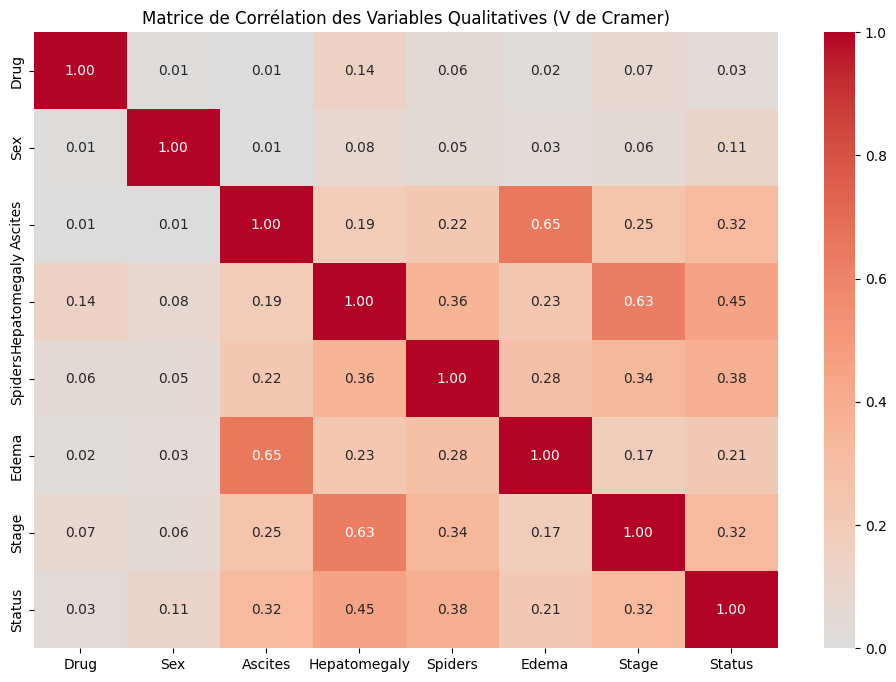

In [217]:
import scipy.stats as ss

def cramers_v(x, y):
    """Calcule le V de Cramer entre deux variables catégorielles."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Sélection des colonnes qualitatives
categorical_columns = train_df.select_dtypes(include=['object']).columns

cramer_matrix = pd.DataFrame(np.zeros((len(categorical_columns), len(categorical_columns))),
                             index=categorical_columns, columns=categorical_columns)

for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            cramer_matrix.loc[col1, col2] = cramers_v(train_df[col1], train_df[col2])
        else:
            cramer_matrix.loc[col1, col2] = 1  

plt.figure(figsize=(12, 8))
sns.heatmap(cramer_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, vmin=0, vmax=1)
plt.title("Matrice de Corrélation des Variables Qualitatives (V de Cramer)")
plt.show()


> 🔍 **Analyse des corrélations des variables catégorielles :**
>
> 👉 **Ascites ↔ Edema (0.65) :**
> La présence d'ascite est fortement liée à l'œdème (rétention d'eau dans les tissus). Ceci est médicalement cohérent, car l’ascite et l'œdème sont souvent des symptômes associés aux maladies hépatiques.
>
> 👉 **Hepatomegaly ↔ Stage (0.63) :**
> L'hépatomégalie (augmentation du foie) est fortement associée au stade de la maladie. Plus la maladie hépatique est avancée, plus la probabilité d’avoir une hépatomégalie est élevée.

### 📌 Test du Chi2 pour déterminer s’il existe un lien entre les variables catégorielles et la variables cible :

In [218]:
# Test du Chi2 pour déterminer s’il existe un lien entre 2 variables catégorielles :
from scipy.stats import chi2_contingency

for col in categorical_columns:
    if col != 'Status':
        contingency_table = pd.crosstab(train_df[col], train_df['Status'])
        chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

        print(f"Variable : {col}")
        print(f"Statistique du chi-carré : {chi2_stat}")
        print(f"Valeur p : {p_val}")
        print("\n")


Variable : Drug
Statistique du chi-carré : 10.398610569958167
Valeur p : 0.005520398192462929


Variable : Sex
Statistique du chi-carré : 187.76010370560022
Valeur p : 1.6920434828805052e-41


Variable : Ascites
Statistique du chi-carré : 861.2489096270547
Valeur p : 9.597884113653021e-188


Variable : Hepatomegaly
Statistique du chi-carré : 1721.4629220345441
Valeur p : 0.0


Variable : Spiders
Statistique du chi-carré : 1261.8005479313981
Valeur p : 1.008073934491804e-274


Variable : Edema
Statistique du chi-carré : 1337.2522922055573
Valeur p : 2.7873191207540522e-288


Variable : Stage
Statistique du chi-carré : 2992.3917582734034
Valeur p : 0.0




> 🔍 Analyse test :
>
> On constate ici que toutes les variables catégorielles semblent être significativement associées à la variable cible 'Status'.

### 📌 Test ANOVA pour déterminer s'il un lien entre les varaibles continues et la variable cible qualitative :

In [219]:
import scipy.stats as st

for v in continuous_columns:  # Liste des variables continues
    groups = [train_df[train_df["Status"] == category][v].dropna() for category in train_df["Status"].unique()]
    
    # 3 groupes non vides
    if all(len(group) > 1 for group in groups):
        f_stat, p_value = st.f_oneway(*groups)
        print(f"{v}: p-value test ANOVA = {p_value:.4f}")
    else:
        print(f"{v}: Pas assez de données pour réaliser l'ANOVA.")


N_Days: p-value test ANOVA = 0.0000
Age: p-value test ANOVA = 0.0000
Bilirubin: p-value test ANOVA = 0.0000
Cholesterol: p-value test ANOVA = 0.0000
Albumin: p-value test ANOVA = 0.0000
Copper: p-value test ANOVA = 0.0000
Alk_Phos: p-value test ANOVA = 0.0000
SGOT: p-value test ANOVA = 0.0000
Tryglicerides: p-value test ANOVA = 0.0000
Platelets: p-value test ANOVA = 0.0000
Prothrombin: p-value test ANOVA = 0.0000


In [220]:
# forte relation entre chaque variable continue et Status

In [221]:
# Vérification des hypothèses de l'ANOVA : 
# - Normalité des résidus
# - Homogénéité des variances : 
#   -> Test de Levene : test de l'égalité des variances entre les groupes

from scipy.stats import levene

stat, p_lev = levene(*groups)
print(f"Test de Levene pour {v}: p-value = {p_lev:.4f}")

# Hypothèse d'homogénéité des variances pas respectée : les variances ne sont pas égales entre les groupes.

Test de Levene pour Prothrombin: p-value = 0.0000


In [222]:
# Faire plutot un test de kruskal qui est equivalent à l'ANOVA mais dans le cadre non paramétrique:
from scipy.stats import kruskal

h_stat, p_kruskal = kruskal(*groups)
print(f"{v}: p-value test Kruskal-Wallis = {p_kruskal:.4f}")

# -> il y a une différence significative entre les groupes pour chaque variable continue


Prothrombin: p-value test Kruskal-Wallis = 0.0000


# <span style="color:red">🔴 2. Exploration et préparation des données de la base de test</span>

## 💻 Importation 

In [223]:
# traiter de la même manière le jeu de données test
test_df = pd.read_csv('classification-multi-classes/test.csv', 
                      delimiter = ",",
                      header = 0)
print(test_df.shape)


(10000, 19)


In [224]:
test_df.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,15000,611.0,D-penicillamine,21828.0,F,N,Y,N,N,0.8,198.0,3.90,39.0,855.0,66.65,56.0,295.0,10.5,4.0
1,15001,2103.0,NaN,21915.0,F,NaN,NaN,NaN,N,0.6,NaN,3.81,NaN,NaN,NaN,NaN,269.0,10.5,3.0
2,15002,130.0,NaN,23011.0,F,NaN,NaN,NaN,N,0.7,NaN,3.94,NaN,NaN,NaN,NaN,425.0,10.8,4.0
3,15003,1635.0,NaN,20089.0,F,NaN,NaN,NaN,N,0.6,NaN,3.50,NaN,NaN,NaN,NaN,248.0,10.3,2.0
4,15004,3336.0,D-penicillamine,15031.0,F,N,N,N,N,0.5,NaN,4.52,29.0,766.0,74.40,NaN,474.0,10.1,2.0


In [225]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   N_Days         9999 non-null   float64
 2   Drug           5660 non-null   object 
 3   Age            10000 non-null  float64
 4   Sex            10000 non-null  object 
 5   Ascites        5666 non-null   object 
 6   Hepatomegaly   5665 non-null   object 
 7   Spiders        5660 non-null   object 
 8   Edema          10000 non-null  object 
 9   Bilirubin      10000 non-null  float64
 10  Cholesterol    4438 non-null   float64
 11  Albumin        10000 non-null  float64
 12  Copper         5604 non-null   float64
 13  Alk_Phos       5660 non-null   float64
 14  SGOT           5656 non-null   float64
 15  Tryglicerides  4407 non-null   float64
 16  Platelets      9625 non-null   float64
 17  Prothrombin    9989 non-null   float64
 18  Stage  

## <span style="color:blue">🔷 Valeurs manquantes</span>

In [226]:
# Valeur manquante
test_df.isna().sum()/len(test_df)*100
test_df.isnull().sum()

id                  0
N_Days              1
Drug             4340
Age                 0
Sex                 0
Ascites          4334
Hepatomegaly     4335
Spiders          4340
Edema               0
Bilirubin           0
Cholesterol      5562
Albumin             0
Copper           4396
Alk_Phos         4340
SGOT             4344
Tryglicerides    5593
Platelets         375
Prothrombin        11
Stage               0
dtype: int64

## <span style="color:blue">🔷 Analyse détaillée de chaque variables</span>

* Type :

In [227]:
test_df[test_df['N_Days'].isna()]

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
8525,23525,NaN,NaN,20232.0,F,NaN,NaN,NaN,N,1.8,NaN,3.24,NaN,NaN,NaN,NaN,NaN,13.8,4.0


In [228]:
# Imputer les valeurs manquantes pour la variable N_Days par la médiane
test_df['N_Days'] = test_df['N_Days'].fillna(test_df['N_Days'].median())

In [229]:
# Mettre N_Days en int
test_df['N_Days'] = test_df['N_Days'].astype('int')

# stage mettre en object
test_df['Stage'] = test_df['Stage'].astype('object')

* N_days

In [230]:
test_df['N_Days'].describe()

count    10000.00000
mean      1971.76850
std       1285.82803
min         10.00000
25%       1097.00000
50%       1790.00000
75%       2609.00000
max      25772.00000
Name: N_Days, dtype: float64

In [231]:
print(test_df['N_Days'].max()/365)

70.6082191780822


* Drug : 

In [232]:
test_df['Drug'].describe()

count                5660
unique                  3
top       D-penicillamine
freq                 3036
Name: Drug, dtype: object

In [233]:
test_df['Drug'].value_counts(dropna=False, normalize=True)
# modalité drug en trop mettre en NaN

Drug
NaN                0.4340
D-penicillamine    0.3036
Placebo            0.2623
Drug               0.0001
Name: proportion, dtype: float64

In [234]:
# Liste des modalités valides pour la colonne 'Drug'
valid_drugs = ['D-penicillamine', 'Placebo']

# Remplacer les modalités en trop par NaN
test_df['Drug'] = test_df['Drug'].apply(lambda x: x if x in valid_drugs else np.nan)

* Age : 

In [235]:
test_df['Age'].describe()
# valeur minimale extremement petite

count    10000.000000
mean     19256.849000
std       3667.625615
min        174.000000
25%      16300.000000
50%      19544.000000
75%      22336.000000
max      35119.000000
Name: Age, dtype: float64

In [236]:
test_df[test_df['Age']<test_df['N_Days']]
# problème à ce niveau car il est impossible d'avoir un age inferieur au nombre de jour de traitement
# on constate que ce problème est lié aux valeurs(abberantes) minimales

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
711,15711,25598,D-penicillamine,25569.0,F,N,Y,N,N,0.8,NaN,3.06,94.0,6456.2,56.76,NaN,146.0,10.9,4.0
4253,19253,22642,Placebo,22369.0,F,N,Y,Y,N,0.6,127.1,3.04,23.0,797.0,49.60,85.0,316.0,11.0,4.0
4698,19698,1086,NaN,174.0,F,NaN,NaN,NaN,N,0.8,NaN,2.93,NaN,NaN,NaN,NaN,174.0,10.4,2.0
9291,24291,1725,NaN,1141.0,F,NaN,NaN,NaN,N,0.7,NaN,3.65,NaN,NaN,NaN,NaN,418.0,10.6,3.0


In [237]:
# si N_Days > Age, alors N_Days = Age
test_df.loc[test_df['N_Days'] > test_df['Age'], 'N_Days'] = test_df['Age']

In [238]:
test_df[test_df['Age']<test_df['N_Days']]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage


In [239]:
# probleme avec age qui est en jour
test_df['Age'] = round(test_df['Age'] / 365, 0)

In [240]:
test_df['Age'].describe()

count    10000.000000
mean        52.744900
std         10.021061
min          0.000000
25%         45.000000
50%         54.000000
75%         61.000000
max         96.000000
Name: Age, dtype: float64

In [241]:
# age mettre en int
test_df['Age'] = test_df['Age'].astype('int')

In [242]:
# On remarque toujours la présence de valeurs très petites pour l'âge
test_df[test_df['Age'] == 0]


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
4698,19698,174,NaN,0,F,NaN,NaN,NaN,N,0.8,NaN,2.93,NaN,NaN,NaN,NaN,174.0,10.4,2.0


* Sex :

In [243]:
test_df['Sex'].describe()


count     10000
unique        2
top           F
freq       9631
Name: Sex, dtype: object

In [244]:
test_df['Sex'].value_counts(dropna=False, normalize=True) 
# Prendre en compte dans l'analyse que 96% des individus sont des femmes 

Sex
F    0.9631
M    0.0369
Name: proportion, dtype: float64

* Ascites : Présence d’ascite (accumulation de liquide dans la cavité abdominale). Valeurs possibles : Yes, No, ou NA (inconnue).

In [245]:
test_df['Ascites'].describe()

count     5666
unique       2
top          N
freq      5401
Name: Ascites, dtype: object

In [246]:
test_df['Ascites'].value_counts()

Ascites
N    5401
Y     265
Name: count, dtype: int64

* Hepatomegaly : présence ou non d'une hépatomégalie, qui est une augmentation anormale de la taille du foie

In [247]:
test_df['Hepatomegaly'].value_counts(normalize=True,dropna=False )

Hepatomegaly
NaN    0.4335
N      0.3138
Y      0.2527
Name: proportion, dtype: float64

* Spiders : présence de spiders angiomas -> signes cliniques courants dans les maladies du foie, notamment dans la cirrhose ou l'hypertension portale.

In [248]:
test_df['Spiders'].value_counts(normalize=True,dropna=False )

Spiders
N      0.4529
NaN    0.4340
Y      0.1130
C      0.0001
Name: proportion, dtype: float64

In [249]:
# Liste des modalités valides pour la colonne 'spiders'
valid_spiders = ['N', 'Y']

# Remplacer les modalités en trop par NaN
test_df['Spiders'] = test_df['Spiders'].apply(lambda x: x if x in valid_spiders else np.nan)

* Edema : présence d'œdème, qui est un gonflement causé par l'accumulation de liquide dans les tissus du corps

In [250]:
test_df['Edema'].value_counts(normalize=True,dropna=False )


Edema
N    0.9269
S    0.0502
Y    0.0229
Name: proportion, dtype: float64

* Bilirubin : 

In [251]:
test_df['Bilirubin'].describe()

count    10000.000000
mean         1.819810
std          2.690813
min          0.300000
25%          0.600000
50%          0.900000
75%          1.800000
max         28.000000
Name: Bilirubin, dtype: float64

* Cholesterol : 

In [252]:
# Calcul des statistiques basiques. On se rend compte que c'est en dg/dl. 
test_df['Cholesterol'].describe()

count    4438.000000
mean      325.586999
std       185.773677
min        57.000000
25%       239.000000
50%       280.000000
75%       357.500000
max      4332.000000
Name: Cholesterol, dtype: float64

In [253]:
# Passage de dg/dL --> g/L
test_df['Cholesterol'] = test_df['Cholesterol']/100

In [254]:
test_df['Cholesterol'].describe()
# moyenne relativement basse : bonne santé ou un groupe avec un contrôle strict de leur cholestérol (par exemple, régime ou médicaments).
# l'écart-type : variabilité importante dans les taux de cholestérol
# valeur extrême : extrêmement élevé et dépasse largement les seuils normaux -> cas graves d'hypercholestérolémie 

count    4438.000000
mean        3.255870
std         1.857737
min         0.570000
25%         2.390000
50%         2.800000
75%         3.575000
max        43.320000
Name: Cholesterol, dtype: float64

* Albumin :

In [255]:
# Mesure en g/L
test_df['Albumin'].describe()
# valeur extreme minimale : cas de malnutrition, d'insuffisance hépatique, de syndrome néphrotique ou d'inflammation chronique
# le reste semble normal

count    10000.000000
mean         3.525730
std          0.364366
min          1.960000
25%          3.290000
50%          3.580000
75%          3.770000
max          4.640000
Name: Albumin, dtype: float64

* Copper :

In [256]:
# Les mesures semblent être en µg/dL.
test_df['Copper'].describe()
# Écart-type énorme par rapport à la moyenne : très grande variabilité dans les taux de cuivre. Cela est inhabituel et suggère que certains individus ont des taux de cuivre extrêmement élevés ou extrêmement bas.
# 25% des individus ont des taux inférieurs à 31 µg/dL :  très bas et en dehors de la plage normale (déficience probable).
# La médiane (50%) est de 52 µg/dL: sous la limite normale pour les adultes (70 µg/dL). Cela suggère que la majorité des individus de cet échantillon ont des niveaux de cuivre insuffisants.
# 75% des individus ont des taux inférieurs à 86 µg/dL, ce qui est légèrement dans la norme, mais globalement encore bas.
# valeurs extremes maximale :  cas de toxicité au cuivre, ce qui peut survenir dans des situations comme :Maladie de Wilson (accumulation excessive de cuivre), Consommation excessive de cuivre (eau contaminée, compléments alimentaires), Troubles métaboliques rares.
# valeurs extremes minimale : peut être associé à des déficiences sévères en cuivre.

count    5604.000000
mean       73.066560
std        74.474491
min         4.000000
25%        31.000000
50%        52.000000
75%        84.000000
max      2064.000000
Name: Copper, dtype: float64

* Alk_phos : 

In [257]:
test_df['Alk_Phos'].describe()

count     5660.000000
mean      1584.826104
std       1764.654042
min          1.950000
25%        688.000000
50%       1054.000000
75%       1623.000000
max      18993.400000
Name: Alk_Phos, dtype: float64

* SGOT : 

In [258]:
# (AST - Aspartate Aminotransferase), un marqueur enzymatique lié à la santé du foie et des muscles. Mesuré en U/L.
test_df['SGOT'].describe()

count    5656.000000
mean      104.874194
std        49.717850
min        17.040000
25%        70.000000
50%        96.100000
75%       130.200000
max       601.450000
Name: SGOT, dtype: float64

* **Tryglicerides**


In [259]:
# évaluer les risques cardiovasculaires et métaboliques (lié au cholestérole . Mesure en mg/dL
test_df['Tryglicerides'].describe()

count    4407.000000
mean      108.867484
std        48.621325
min        33.000000
25%        78.000000
50%        97.000000
75%       128.000000
max       598.000000
Name: Tryglicerides, dtype: float64

* **Platelets**

In [260]:
# Analyse des valeurs de plaquettes. Mesure : × 10³/µL
test_df['Platelets'].describe()
# moyenne normale
# écart type normal
# valeurs extremes maximale : considérablement élevé et peut être classé comme thrombocytose.
# valeurs extremes minimale : basse et représente une thrombopénie sévère

count    9625.000000
mean      255.151688
std        94.743520
min         3.000000
25%       188.000000
50%       251.000000
75%       312.000000
max       735.000000
Name: Platelets, dtype: float64

* **Prothrombin**

In [261]:
# Indicateur de la coagulation sanguine et de la fonction hépatique. Mesure en secondes
test_df['Prothrombin'].describe()
# moyenne normale
# écart type normal
# valeurs extremes maximale : considérablement élevé et peut être un signe d'anomalies importantes.
# valeurs extremes minimale : 

count    9989.000000
mean       10.628016
std         0.756671
min         9.000000
25%        10.100000
50%        10.600000
75%        11.000000
max        18.000000
Name: Prothrombin, dtype: float64

* **Stage**

In [262]:
# Pas de valeurs manquantes pour cette variable
test_df['Stage'].value_counts(normalize=True, dropna=False)

Stage
3.0    0.3786
4.0    0.3457
2.0    0.2294
1.0    0.0463
Name: proportion, dtype: float64

In [263]:
train_df.to_csv('/Users/melaniedaddio/Desktop/M2_S1/eco_non_lineaire/Classification-multi-classes/train_df_clean.csv', index=False)

test_df.to_csv('/Users/melaniedaddio/Desktop/M2_S1/eco_non_lineaire/Classification-multi-classes/test_df_clean.csv', index=False)

